# Alan Saul Bonilla Vizcarra
23000220 

Fundamentos de Machine Learning

Analisis del RIT Dataset

# Importar librerias

pip install --upgrade pip pandas matplotlib seaborn scikit-learn statsmodels xgboost tensorflow optuna IPython pydotplus graphviz keras

pip install --upgrade pip pandas matplotlib seaborn scikit-learn statsmodels xgboost tensorflow optuna IPython pydotplus graphviz keras

In [1]:
#Librerias basicas
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import collections
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import perf_counter
import os

#Feature Selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE #Para Regresion Logistica
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFECV


#Metricas de desempeño
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, average_precision_score, log_loss, matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

#Dividir conjutno
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
#Estandarizacion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#Modelos ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.naive_bayes import GaussianNB

#Optimizacion
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import optuna
from optuna.samplers import TPESampler

#Visualizacion de desempeño
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus




# Archivo CSV

In [2]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: FA67-B665

 Directorio de c:\Users\Alsabov\Desktop\Mi unidad\Maestria CI\2 Semestre\Fundamentos de Aprendizaje Automatico\VoIP Enterprise - Attack Dataset

09/06/2025  07:35 a. m.    <DIR>          .
09/06/2025  07:35 a. m.    <DIR>          ..
11/05/2025  11:13 p. m.    <DIR>          .ipynb_checkpoints
27/01/2025  01:08 p. m.    <DIR>          .vs
09/06/2025  07:35 a. m.         3,354,233 11Analisis del RIT Dataset con ML copy.ipynb
06/06/2025  09:57 a. m.         5,103,536 11Analisis del RIT Dataset con ML.ipynb
04/06/2025  03:07 p. m.         4,458,906 22Analisis del RIT Dataset con ML.ipynb
04/06/2025  05:46 p. m.         4,294,649 33Analisis del RIT Dataset con ML.ipynb
04/06/2025  10:10 p. m.         4,495,682 44Analisis del RIT Dataset con ML.ipynb
03/05/2024  12:55 p. m.         2,889,481 alvares2021.pdf
12/05/2025  03:17 p. m.         4,791,462 Analisis del RIT Dataset con ML - copia.ipynb
31/10

In [3]:
cd "VoIP Enterprise - Attack Dataset"

c:\Users\Alsabov\Desktop\Mi unidad\Maestria CI\2 Semestre\Fundamentos de Aprendizaje Automatico\VoIP Enterprise - Attack Dataset\VoIP Enterprise - Attack Dataset


In [4]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: FA67-B665

 Directorio de c:\Users\Alsabov\Desktop\Mi unidad\Maestria CI\2 Semestre\Fundamentos de Aprendizaje Automatico\VoIP Enterprise - Attack Dataset\VoIP Enterprise - Attack Dataset

09/06/2025  05:47 a. m.    <DIR>          .
09/06/2025  05:47 a. m.    <DIR>          ..
09/06/2025  05:45 a. m.        10,690,927 archivo_concatenado.csv
31/12/1979  05:00 p. m.        10,461,449 AtaquesRIT.csv
18/05/2025  01:44 p. m.    <DIR>          csv
09/06/2025  05:46 a. m.    <DIR>          Nueva carpeta
09/06/2025  05:33 a. m.    <DIR>          Nueva carpeta (2)
19/05/2025  11:59 a. m.           619,489 prueba-17-0905-1.csv
27/05/2025  10:03 a. m.           140,718 prueba-19-1005-2.csv
19/05/2025  12:12 p. m.           297,094 prueba-4-0405.csv
19/05/2025  11:56 a. m.    <DIR>          Saneado
09/06/2025  05:47 a. m.           230,008 Saneado.csv
20/05/2025  12:11 p. m.    <DIR>          VoIPEnterprise
        

In [5]:
# os.remove('archivo_concatenado.csv')
# ruta = "*.csv"
# Lista de DataFrames cargando cada archivo CSV
# dataframes = [pd.read_csv(archivo) for archivo in glob.glob(ruta)]

# Concatenar todos los DataFrames en uno solo
# df_concatenado = pd.concat(dataframes, ignore_index=True)

# Opcional: guardar el resultado en un nuevo archivo CSV
# df_concatenado.to_csv("archivo_aconcatenado.csv", index=False)

# Importar Dataset

Comenzamos leyendo el dataset con el metodo `pd.read_csv()`

In [6]:
#df=pd.read_csv('Rochester.csv')
dfataque=pd.read_csv('AtaquesRIT.csv')
dfvalidacion=pd.read_csv('prueba-17-0905-1.csv')
dfsaneado=pd.read_csv('Saneado.csv')

print('dfataque',dfataque.shape,'dfvalidacion',dfvalidacion.shape,'dfsaneado',dfsaneado.shape)

df = pd.concat([dfataque, dfvalidacion, dfsaneado], ignore_index=True)
df.shape

dfataque (52866, 52) dfvalidacion (1887, 52) dfsaneado (735, 52)


(55488, 52)

## Acerca del dataset

Para el presente trabajo, se utliza el dataset proveido del paper *"Dataset of attacks on a live enterprise VoIP network for machine learning based intrusion detection and prevention systems"* del Rochester Institute of Technology, Dubai, United Arab Emirates.
Este dataset proporciona acceso a datos en bruto de una red VoIP empresarial gestionada por medio de Asterisk 17.0, programa de software libre que proporciona funcionalidades de una central telefónica.
Contiene registros de varios tipos de ataques que proporcionan a los investigadores una variedad de escenarios de ataque para investigar y/o entrenar modelos.


Para trabajar el dataset, es necesario utilizar una herramienta de conversion dado que los archivos vienen en formato PCAP el cual es un método para la captura, almacenamiento y análisis del tráfico de red.
Se utilizo la herramienta **3FEx: Fast Flow Feature Extractor** la cual agrupa los paquetes en flujos y los almacena en un archivo csv, extrayendo las siguientes caracteristicas

## Descripcion de las features
En la literatura de la herramienta utilizada para obtener los datos tenemos una descripcion detallada de lo que significa cada feature
| No. | Feature Name | Description |
| --- | --- | --- |
|0|proto| Protocol type|
|1|ts|Session time stamp|
|2|srcIP|IPv4 source address|
|3|srcPort| Source port|
|4|dstIP|IPv4 destination address|
|5|dstPort|Destination port|
|6|flowduration|Session duration|
|7|total_fpackets|Number of packets in the forward direction|
|8|total_bpackets|Number of packets in the backward direction|
|9|total_fpktl|Transmited bytes in forward direction|
|10|total_bpktl|Transmited bytes in backward direction|
|11|min_fpktl|Minimum packet size in forward direction|
|12|min_bpktl|Minimum packet size in backward direction|
|13|max_fpktl|Maximum packet size in forward direction|
|14| max_bpktl|Maximum packet size in backward direction|
|15|mean_fpktl|Mean packet size in forward direction|
|16| mean_bpktl|Mean packet size in backward direction|
|17|std_fpktl|Standard deviation packet size in forward direction|
|18|std_bpktl|Standard deviation packet size in backward direction|
|19|total_ﬁpt|Sum of interarrival times in forward direction|
|20|total_bipt|Sum of interarrival times in backward direction|
|21| min_ﬁpt|Minimum interarrival time in forward direction|
|22|min_bipt|Minimum interarrival time in backward direction|
|23| max_ﬁpt|Maximum interarrival time in forward direction|
|24| max_bipt|Maximum interarrival time in backward direction|
|25| mean_ﬁpt|Mean interarrival time in forward direction|
|26| mean_bipt|Mean interarrival time in backward direction|
|27|std_ﬁpt|Standard deviation packet size in forward direction|
|28|std_bipt|Standard deviation packet size in backward direction|
|29|fpsh_cnt|Number PSH ﬂags in forward direction|
|30|bpsh_cnt|Number PSH ﬂags in backward direction|
|31|furg_cnt|Number URG ﬂags in forward direction|
|32| burg_cnt|Number URG ﬂags in backward direction|
|33|total_fhlen|Sum of headers length in forward direction|
|34|total_bhlen|Sum of headers length in backward direction|
|35|fPktsPerSecond|Packets per second in forward direction|
|36|bPktsPerSecond|Packets per second in backward direction|
|37| ﬂowBytesPerSecond|Total Bytes per second in session|
|38| mean_ﬂowpktl|Average package length|
|39|std_ﬂowpktl|Standard deviation of package length|
|40| mean_ﬂowipt|Average of interarrival times|
|41|std_ﬂowipt|Standard deviation of interarrival times|
|42| ﬂow_ﬁn|Number of packets with FIN ﬂag set. Is set to signal the graceful termination of a connection.|
|43| ﬂow_syn|Number of packets with SYN ﬂag set. It is used to request the establishment of a connection|
|44| ﬂow_rst|Number of packets with RST ﬂag set. The reset flag is used to terminate a connection abruptly.|
|45| ﬂow_ack|Number of packets with ACK ﬂag set. It is set in response to a received packet with the SYN flag.|
|46| ﬂow_urg|Number of packets with URG ﬂag set. Is used to indicate that the data in the packet is urgent and should be processed immediately.|
|47| ﬂow_cwr|Number of packets with CWR ﬂag set. This flag is used to indicate that the TCP sender is reducing its congestion window.|
|48| ﬂow_ece|Number of packets with ECE ﬂag set. Is used in conjunction with the CWR flag to indicate that congestion has been encountered in the network|
|49| downUpRatio|Download and upload ratio|

## Tipos de ataques
Los ataques que el dataset recolecto y se utlizaron para el presente trabajo son los siguientes:
- **BYE attack:** "El BYE es un ataque de suplantación que envía mensajes BYE (indicando la finalización de una sesión) a un servidor SIP para terminar llamadas activas legítimas en la red VoIP.
- **INVITE flood attack:** En este tipo de ataque, se envían una gran cantidad de mensajes INVITE a un servidor con el objetivo de agotar los recursos del servidor, como la CPU y la memoria
- **REGISTER hijacking attack:** implica que un atacante se haga pasar por un usuario legítimo al reemplazar la dirección de registro de un agente de usuario (UA) con su propia dirección.
- **RTP flood attack:** En un ataque de inundación RTP, los atacantes generan y envían una gran cantidad de paquetes RTP falsificados o innecesarios a un dispositivo o servidor VoIP con el objetivo de abrumar el sistema y agotar sus recursos. Este tipo de ataque puede causar **interrupciones en la calidad del servicio, retrasos en la comunicación y**, en casos extremos, la **interrupción total del servicio de VoIP**.  
- **REGISTER flood (SIPsak):** En este tipo de ataque, los atacantes envían una gran cantidad de paquetes de registro SIP (REGISTER) al servidor SIP con el objetivo de agotar sus recursos y provocar una denegación de servicio. Esto puede causar puede causar retrasos en la entrega de paquetes, pérdida de llamadas y una degradación general en la calidad del servicio.


# EDA

Con el metodo `head()` hacemos que nos muestre los 5 primeros rasgos del Dataset

In [7]:
##Configuramos para que muestre todas las columnas
pd.set_option('display.max_columns', None)

In [8]:
df.head()

proto          ts         srcIP srcPrt          dstIP  dstPrt  flowduration  \
0   UDP  1597740714  172.168.1.44   4000  192.168.1.127    5060    522.293150   
1   UDP  1597738733  172.168.1.44   4000  192.168.1.127    5060      0.001746   
2   UDP  1597738932  172.168.1.44   4000  192.168.1.127    5060      0.001163   
3   UDP  1597739056  172.168.1.44   4000  192.168.1.127    5060      0.001155   
4   UDP  1597743924  172.168.1.44   4000  192.168.1.127    5060     54.349883   

   total_fpackets  total_bpackets  total_fpktl  total_bpktl  min_fpktl  \
0               9               9         3960         4431        440   
1               1               1          440          485        440   
2               1               1          440          507        440   
3               1               1          440          507        440   
4               2               2          881          993        440   

   min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  std_fpktl  \
0        485        440        507       440.0  492.333344   0.000000   
1        485        440        485       440.0  485.000000   0.000000   
2        507        440        507       440.0  507.000000   0.000000   
3        507        440        507       440.0  507.000000   0.000000   
4        485        441        508       440.5  496.500000   0.707107   

   std_bpktl  total_fipt  total_bipt   min_fipt   min_bipt   max_fipt  \
0  11.000000  522.292961  522.293022  45.285080  45.284916  89.902214   
1   0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
2   0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
3   0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
4  16.263456   54.349682   54.349739  54.349682  54.349739  54.349682   

    max_bipt  mean_fipt  mean_bipt   std_fipt   std_bipt  fpsh_cnt  bpsh_cnt  \
0  89.902138  65.286621  65.286629  17.040119  17.040142         0         0   
1   0.000000   0.000000   0.000000   0.000000   0.000000         0         0   
2   0.000000   0.000000   0.000000   0.000000   0.000000         0         0   
3   0.000000   0.000000   0.000000   0.000000   0.000000         0         0   
4  54.349739  54.349682  54.349739   0.000000   0.000000         0         0   

   furg_cnt  burg_cnt  total_fhlen  total_bhlen  fPktsPerSecond  \
0         0         0         3654         4125        0.017232   
1         0         0          406          451      572.757629   
2         0         0          406          473      859.840942   
3         0         0          406          473      865.697449   
4         0         0          813          925        0.036799   

   bPktsPerSecond  flowBytesPerSecond  mean_flowpktl  std_flowpktl  \
0        0.017232           16.065691     466.166667     27.962685   
1      572.757629       529800.812500     462.500000     31.819805   
2      859.840942       814269.375000     473.500000     47.376156   
3      865.697449       819815.437500     473.500000     47.376156   
4        0.036799           34.480293     468.500000     33.669968   

   mean_flowipt  std_flowipt  flow_fin  flow_syn  flow_rst  flow_ack  \
0     30.723243    35.430126         0         0         0         0   
1      0.001746     0.000000         0         0         0         0   
2      0.001163     0.000000         0         0         0         0   
3      0.001155     0.000000         0         0         0         0   
4     18.116675    31.378703         0         0         0         0   

   flow_urg  flow_cwr  flow_ece  downUpRatio  label  Ataque  
0         0         0         0     1.118939      1       1  
1         0         0         0     1.102273      1       1  
2         0         0         0     1.152273      1       1  
3         0         0         0     1.152273      1       1  
4         0         0         0     1.127128      1       1

Con la variable `target_names` definimos los nombres de las clases

In [9]:
target_names = ['class 0', 'class 1']

Aplicamos el metodo `describe()` para conocer las estadisiticas del Dataset

In [10]:
df.describe()

dstPrt  flowduration  total_fpackets  total_bpackets  \
count  55488.000000  55488.000000    55488.000000    55488.000000   
mean    9833.924146      4.333621       40.142499       45.267932   
std    14759.497968    150.407019     1355.495933     2508.050647   
min        0.000000      0.000000        0.000000        0.000000   
25%     1169.000000      0.000000        1.000000        0.000000   
50%     5001.000000      0.000000        1.000000        0.000000   
75%     9010.000000      0.000000        1.000000        0.000000   
max    65389.000000  22919.559380   188752.000000   309705.000000   

        total_fpktl   total_bpktl     min_fpktl     min_bpktl     max_fpktl  \
count  5.548800e+04  5.548800e+04  55488.000000  55488.000000  55488.000000   
mean   1.441979e+04  1.866930e+04     74.699971     18.323565     95.113790   
std    6.731386e+05  1.482617e+06     80.179775     84.875222    169.485956   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    5.800000e+01  0.000000e+00     58.000000      0.000000     58.000000   
50%    5.800000e+01  0.000000e+00     58.000000      0.000000     58.000000   
75%    5.800000e+01  0.000000e+00     58.000000      0.000000     58.000000   
max    7.149178e+07  1.957336e+08   1272.000000    641.000000   2946.000000   

          max_bpktl    mean_fpktl    mean_bpktl     std_fpktl     std_bpktl  \
count  55488.000000  55488.000000  55488.000000  55488.000000  55488.000000   
mean      29.737277     85.509439     22.921483      8.728229      2.758787   
std      139.746191    122.546880    103.592589     48.326188     19.417506   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000     58.000000      0.000000      0.000000      0.000000   
50%        0.000000     58.000000      0.000000      0.000000      0.000000   
75%        0.000000     58.000000      0.000000      0.000000      0.000000   
max     1399.000000   1272.000000    691.750000    514.821206    477.811894   

         total_fipt    total_bipt      min_fipt      min_bipt      max_fipt  \
count  55488.000000  55488.000000  55488.000000  55488.000000  55488.000000   
mean       3.597698      4.095042      0.010920      0.010418      0.137453   
std      150.184952    149.461210      0.553342      0.595392      2.291276   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max    22919.559390  22877.935190     55.356758     60.015919    128.074188   

           max_bipt     mean_fipt     mean_bipt      std_fipt      std_bipt  \
count  55488.000000  55488.000000  55488.000000  55488.000000  55488.000000   
mean       0.350750      0.048431      0.114784      0.040782      0.105368   
std        3.826571      0.817951      1.212393      0.670047      1.183815   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      347.274963     67.291229     67.291229     51.929943     82.649437   

           fpsh_cnt      bpsh_cnt  furg_cnt      burg_cnt   total_fhlen  \
count  55488.000000  55488.000000   55488.0  55488.000000  5.548800e+04   
mean       0.557490      0.552714       0.0      0.001910  1.302090e+04   
std      127.565939    127.659047       0.0      0.318191  6.328968e+05   
min        0.000000      0.000000       0.0      0.000000  0.000000e+00   
25%        0.000000      0.000000       0.0      0.000000  2.400000e+01   
50%        0.000000      0.000000       0.0      0.000000  2.400000e+01   
75%        0.00000

El método `info()` muestra el resumen del dataframe, incluyendo información sobre el tipo de los índices de filas y columnas, los valores no nulos y la memoria usada

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55488 entries, 0 to 55487
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   proto               55488 non-null  object 
 1   ts                  55488 non-null  object 
 2   srcIP               55488 non-null  object 
 3   srcPrt              55488 non-null  object 
 4   dstIP               55488 non-null  object 
 5   dstPrt              55488 non-null  int64  
 6   flowduration        55488 non-null  float64
 7   total_fpackets      55488 non-null  int64  
 8   total_bpackets      55488 non-null  int64  
 9   total_fpktl         55488 non-null  int64  
 10  total_bpktl         55488 non-null  int64  
 11  min_fpktl           55488 non-null  int64  
 12  min_bpktl           55488 non-null  int64  
 13  max_fpktl           55488 non-null  int64  
 14  max_bpktl           55488 non-null  int64  
 15  mean_fpktl          55488 non-null  float64
 16  mean

Observamos que en el Dataset no existen objetos nulos/NaN, y en su mayoria esta compuesto por variables int y float.
Para este caso, se eliminan las columnas referentes al Protocolo, direcciones IP y numeros de Puerto para que los modelos puedan aprender de la demas informacion.

In [12]:
df.drop(['proto','ts','srcIP','srcPrt','dstIP','dstPrt'],axis=1,inplace=True)

Aplicamos la funcion `shape` para conocer las dimensiones del dataset

In [13]:
df.shape

(55488, 46)

Con `Counter` obtenemos la cantidad de observaciones de clase positiva y clase negativa. Inicialmente, observamos que el dataset esta muy desbalanceado con una proporcion de aprox 72:1

In [14]:
collections.Counter(df.label.values)

Counter({np.int64(1): 54749, np.int64(0): 739})

In [15]:
collections.Counter(df.Ataque.values)

Counter({np.int64(4): 52043,
         np.int64(10): 1887,
         np.int64(3): 786,
         np.int64(0): 735,
         np.int64(5): 22,
         np.int64(1): 9,
         np.int64(2): 6})

Revisamos por medio de `duplicated().sum()` la cantidad de observaciones duplicadas

Eliminamos dichas observaciones duplicadas para no exponernos a **Data Leak**

In [16]:
# Eliminar duplicados
df = df.drop_duplicates()
# Eliminar duplicados en todas las columnas excepto 'label' y 'Ataque'
df_cleaned = df.drop(['label', 'Ataque'], axis=1).duplicated(keep='first')

# Filtrar el DataFrame original solo por las filas no duplicadas
df_cleaned = df[~df_cleaned]
df=df_cleaned.copy()


Validamos por medio de `isnull().values.sum()` que no existan valores nulos y, en caso de existir, eliminamos la observacion con `dropna(inplace=True)`.

In [17]:
print("Valores nulos antes: ", df.isnull().values.sum())
df.dropna(inplace=True)
print("Valores nulos despues: ", df.isnull().values.sum())


Valores nulos antes:  1
Valores nulos despues:  0


Validamos nuevamente con `shape` y `Counter` la dimension resultante de nuestro dataset.

In [18]:
print("Total de datos; ",df.shape, "de los cuales ",collections.Counter(df.label.values))

Total de datos;  (3618, 46) de los cuales  Counter({np.int64(1): 2893, np.int64(0): 725})


In [19]:
df.describe(include='all').T

count           mean           std   min         25%  \
flowduration        3618.0      66.462651  5.855844e+02   0.0    0.004260   
total_fpackets      3618.0     601.314815  5.277253e+03   1.0    2.000000   
total_bpackets      3618.0     694.191819  9.800344e+03   0.0    2.000000   
total_fpktl         3618.0  220250.290768  2.627877e+06  42.0  188.000000   
total_bpktl         3618.0  286323.768104  5.800377e+06   0.0  359.000000   
min_fpktl           3618.0     244.663350  1.869373e+02  42.0   62.000000   
min_bpktl           3618.0     280.341072  1.920977e+02   0.0   66.000000   
max_fpktl           3618.0     557.740741  4.229493e+02  42.0   96.000000   
max_bpktl           3618.0     455.389165  3.249139e+02   0.0  142.000000   
mean_fpktl          3618.0     410.443267  2.909270e+02  42.0   89.500000   
mean_bpktl          3618.0     350.916876  2.221917e+02   0.0   97.307693   
std_fpktl           3618.0     133.860232  1.381013e+02   0.0    3.709808   
std_bpktl           3618.0      42.310551  6.411005e+01   0.0    0.816497   
total_fipt          3618.0      55.176641  5.858061e+02   0.0    0.002021   
total_bipt          3618.0      62.804234  5.822374e+02   0.0    0.000841   
min_fipt            3618.0       0.167478  2.161220e+00   0.0    0.000041   
min_bipt            3618.0       0.159774  2.326855e+00   0.0    0.000000   
max_fipt            3618.0       2.108064  8.739682e+00   0.0    0.001927   
max_bipt            3618.0       5.379325  1.405594e+01   0.0    0.000838   
mean_fipt           3618.0       0.742772  3.122125e+00   0.0    0.001844   
mean_bipt           3618.0       1.760409  4.432983e+00   0.0    0.000838   
std_fipt            3618.0       0.625458  2.553736e+00   0.0    0.000000   
std_bipt            3618.0       1.615994  4.365408e+00   0.0    0.000000   
fpsh_cnt            3618.0       8.550028  4.995703e+02   0.0    0.000000   
bpsh_cnt            3618.0       8.476783  4.999362e+02   0.0    0.000000   
furg_cnt            3618.0       0.000000  0.000000e+00   0.0    0.000000   
burg_cnt            3618.0       0.000000  0.000000e+00   0.0    0.000000   
total_fhlen         3618.0  199283.475401  2.471373e+06   8.0  111.000000   
total_bhlen         3618.0  262184.251244  5.470283e+06   0.0  289.000000   
fPktsPerSecond      3618.0     808.830704  5.330163e+03   0.0    0.094693   
bPktsPerSecond      3618.0     692.581887  5.280498e+03   0.0    0.340362   
flowBytesPerSecond  3618.0  209629.891733  8.605746e+05   0.0  243.640449   
mean_flowpktl       3618.0     364.612000  2.358243e+02  42.0  129.459459   
std_flowpktl        3618.0      96.888435  8.086372e+01   0.0   10.862828   
mean_flowipt        3618.0       1.104590  1.802906e+00   0.0    0.001829   
std_flowipt         3618.0       1.208551  2.319538e+00   0.0    0.000775   
flow_fin            3618.0       0.075180  4.546176e-01   0.0    0.000000   
flow_syn            3618.0       0.355998  7.698125e-01   0.0    0.000000   
flow_rst            3618.0       0.197070  4.780180e-01   0.0    0.000000   
flow_ack            3618.0      34.228579  1.414543e+03   0.0    0.000000   
flow_urg            3618.0       0.000000  0.000000e+00   0.0    0.000000   
flow_cwr            3618.0       0.004422  2.035958e-01   0.0    0.000000   
flow_ece            3618.0       0.000553  2.350827e-02   0.0    0.000000   
downUpRatio         3618.0       1.684067  2.828219e+00   0.0    0.792665   
label               3618.0       0.799613  4.003453e-01   0.0    1.000000   
Ataque              3618.0       6.315091  4.076976e+00   0.0    4.000000   

                            50%           75%           max  
flowduration           1.304212     41.138606  2.291956e+04  
total_fpackets         3.000000      6.000000  1.887520e+05  
total_bpackets         6.000000     14.000000  3.097050e+05  
total_fpktl         2192.000000   3646.000000  7.149178e+07  
total_bpktl         3132.000000   7827.000000  1.957336e+08  
min_fpktl            380.0000

# Preprocesamiento de los datos

## Feature selection

`Feature selection` es un paso importante en el preprocesamiento de datos y en la ingeniería de características.
 - Hace referencia a la identificación y selección de las características más importantes para el problema que se está abordando.
 - Mejoramos el coste de cálculo necesario, reducimos la complejidad del modelo y mejoramos la precisión del modelo.

### Correlacion de Pearson

Comenzamos observando la matriz del coeficiente de correlación de Pearson

In [20]:
#correlation_matrix = df.drop('label', axis=1).corr()
correlation_matrix = df.corr()
# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Mapa de calor de correlación entre características')
plt.show()

Observamos inconsistencas en las features ademas de alta correlacion en varias de ellas.
Para reducirlo, se aplicaran tecnicas de Feature Engineering,

### VarianceThreshold

- `VarianceThreshold` selecciona solo las features cuya varianza supera un cierto umbral., en este caso *0.05*, lo que equivale a decir que el 95% de los valores en la columna son similares.
    - La idea detrás de este enfoque es que, si la varianza de una variable es pequeña, las probabilidades de que el valor contenido en ella sea el mismo -o muy parecido- son elevadas, por lo que aportará poco al algoritmo.

Para trabajarlo, creamos una copia del dataset, sin tomar encuenta la columna de la clase

In [21]:
X=df.copy()
X.drop(['label','Ataque'],axis=1,inplace=True)

In [22]:
#Generamos el objeto de clase VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.05)
# Lo entrenamos con el dataset
var_thr.fit(X)
# Como resultado obtenemos el siguiente arreglo
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True])

In [23]:
# Imprimimos las features que no cumplen con el umbral
concol = [column for column in X.columns
          if column not in X.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg
flow_cwr
flow_ece


In [24]:
# Eliminamos dichas features
df.drop(concol,axis=1,inplace=True)




Al aplicar el umbral de 5%, fueron seleccionadas y eliminadas 4 caracteristicas

In [25]:
# Imprimimos la dimension final del dataset
df.shape

(3618, 41)

In [26]:
#Calcular la matriz de correlación
#correlation_matrix = df.drop('label', axis=1).corr()
correlation_matrix = df.corr()
# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Mapa de calor de correlación entre características')
plt.show()

Pese a que se corriguieron algunas inconsistencias, se sigue observando que existe alta correlacion en varias de sus caracteristicas. Por lo que procedemos a utilizar otra tecnica de Feature Engineering

### VIF

`Variance Inflation Factor` es una medida utilizada en análisis de regresión para detectar la multicolinealidad entre variables predictoras.
| Valor de VIF | Grado de Muticolinealidad|
| --- | --- |
|Hasta 5|	Débil/Moderado|
|De 5 a 10|	Elevado|
|Mayor a 10|	Muy elevado|

Un VIF alto, indica que la variable correspondiente está altamente correlacionada con otras variables predictoras y puede ser problemática para el modelo.

In [27]:
#Hacemos una copia de nuestro dataset
X=df.copy()
X.drop(['label','Ataque'],axis=1,inplace=True)

In [28]:
# Conjunto de variables predictora

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]

print(vif_data)

               feature           VIF
0         flowduration  2.460779e+03
1       total_fpackets  5.327218e+06
2       total_bpackets  2.374676e+07
3          total_fpktl  1.136044e+09
4          total_bpktl  7.179883e+09
5            min_fpktl  7.343912e+01
6            min_bpktl  2.063874e+02
7            max_fpktl  2.172342e+02
8            max_bpktl  1.324256e+02
9           mean_fpktl  3.949326e+02
10          mean_bpktl  4.309499e+02
11           std_fpktl  1.195346e+02
12           std_bpktl  3.311706e+01
13          total_fipt  1.811718e+03
14          total_bipt  5.497273e+02
15            min_fipt  3.724444e+01
16            min_bipt  1.283338e+01
17            max_fipt  1.026128e+01
18            max_bipt  2.066840e+01
19           mean_fipt  7.205501e+01
20           mean_bipt  3.481267e+01
21            std_fipt  4.250150e+01
22            std_bipt  5.023138e+01
23            fpsh_cnt  1.663949e+06
24            bpsh_cnt  3.009923e+06
25         total_fhlen  1.004211e+09
2

In [29]:
df.drop(['label','Ataque'],axis=1,inplace=False).duplicated().sum()

np.int64(0)

Encontramos que en el conjunto se encuentran features altamente relacionadas, para corregirlo, se utilizaran los metodos de Recursive **Feature Elimination** y **Feature Importance** durante la generacion de los modelos de Regresion Logistica y Arbol de Decision. 


# Creando conjunto de entrenamiento

## Split
La funcion `train_test_split` nos permite dividir un dataset en dos bloques, típicamente bloques destinados al entrenamiento y validación del modelo

In [30]:
df.head()

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0    522.293150               9               9         3960         4431   
1      0.001746               1               1          440          485   
2      0.001163               1               1          440          507   
3      0.001155               1               1          440          507   
4     54.349883               2               2          881          993   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0        440        485        440        507       440.0  492.333344   
1        440        485        440        485       440.0  485.000000   
2        440        507        440        507       440.0  507.000000   
3        440        507        440        507       440.0  507.000000   
4        440        485        441        508       440.5  496.500000   

   std_fpktl  std_bpktl  total_fipt  total_bipt   min_fipt   min_bipt  \
0   0.000000  11.000000  522.292961  522.293022  45.285080  45.284916   
1   0.000000   0.000000    0.000000    0.000000   0.000000   0.000000   
2   0.000000   0.000000    0.000000    0.000000   0.000000   0.000000   
3   0.000000   0.000000    0.000000    0.000000   0.000000   0.000000   
4   0.707107  16.263456   54.349682   54.349739  54.349682  54.349739   

    max_fipt   max_bipt  mean_fipt  mean_bipt   std_fipt   std_bipt  fpsh_cnt  \
0  89.902214  89.902138  65.286621  65.286629  17.040119  17.040142         0   
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000         0   
2   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000         0   
3   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000         0   
4  54.349682  54.349739  54.349682  54.349739   0.000000   0.000000         0   

   bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0         0         3654         4125        0.017232        0.017232   
1         0          406          451      572.757629      572.757629   
2         0          406          473      859.840942      859.840942   
3         0          406          473      865.697449      865.697449   
4         0          813          925        0.036799        0.036799   

   flowBytesPerSecond  mean_flowpktl  std_flowpktl  mean_flowipt  std_flowipt  \
0           16.065691     466.166667     27.962685     30.723243    35.430126   
1       529800.812500     462.500000     31.819805      0.001746     0.000000   
2       814269.375000     473.500000     47.376156      0.001163     0.000000   
3       819815.437500     473.500000     47.376156      0.001155     0.000000   
4           34.480293     468.500000     33.669968     18.116675    31.378703   

   flow_fin  flow_syn  flow_rst  flow_ack  downUpRatio  label  Ataque  
0         0         0         0         0     1.118939      1       1  
1         0         0         0         0     1.102273      1       1  
2         0         0         0         0     1.152273      1       1  
3         0         0         0         0     1.152273      1       1  
4         0         0         0         0     1.127128      1       1

In [31]:
df.shape

(3618, 41)

In [32]:
# Positivos para entrenamiento
df_train = df[(df['Ataque'] != 10) & (df['Ataque'] != 0)].copy()
# Positivos para validación
df_val_pos = df[df['Ataque'] == 10].copy()
# Negativos
df_neg = df[df['Ataque'] == 0].copy()

print("df_train", len(df_train),", df_val_pos", len(df_val_pos),", df_neg", len(df_neg))


df_train 1013 , df_val_pos 1884 , df_neg 721


In [33]:
df_train.head()

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0    522.293150               9               9         3960         4431   
1      0.001746               1               1          440          485   
2      0.001163               1               1          440          507   
3      0.001155               1               1          440          507   
4     54.349883               2               2          881          993   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0        440        485        440        507       440.0  492.333344   
1        440        485        440        485       440.0  485.000000   
2        440        507        440        507       440.0  507.000000   
3        440        507        440        507       440.0  507.000000   
4        440        485        441        508       440.5  496.500000   

   std_fpktl  std_bpktl  total_fipt  total_bipt   min_fipt   min_bipt  \
0   0.000000  11.000000  522.292961  522.293022  45.285080  45.284916   
1   0.000000   0.000000    0.000000    0.000000   0.000000   0.000000   
2   0.000000   0.000000    0.000000    0.000000   0.000000   0.000000   
3   0.000000   0.000000    0.000000    0.000000   0.000000   0.000000   
4   0.707107  16.263456   54.349682   54.349739  54.349682  54.349739   

    max_fipt   max_bipt  mean_fipt  mean_bipt   std_fipt   std_bipt  fpsh_cnt  \
0  89.902214  89.902138  65.286621  65.286629  17.040119  17.040142         0   
1   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000         0   
2   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000         0   
3   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000         0   
4  54.349682  54.349739  54.349682  54.349739   0.000000   0.000000         0   

   bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0         0         3654         4125        0.017232        0.017232   
1         0          406          451      572.757629      572.757629   
2         0          406          473      859.840942      859.840942   
3         0          406          473      865.697449      865.697449   
4         0          813          925        0.036799        0.036799   

   flowBytesPerSecond  mean_flowpktl  std_flowpktl  mean_flowipt  std_flowipt  \
0           16.065691     466.166667     27.962685     30.723243    35.430126   
1       529800.812500     462.500000     31.819805      0.001746     0.000000   
2       814269.375000     473.500000     47.376156      0.001163     0.000000   
3       819815.437500     473.500000     47.376156      0.001155     0.000000   
4           34.480293     468.500000     33.669968     18.116675    31.378703   

   flow_fin  flow_syn  flow_rst  flow_ack  downUpRatio  label  Ataque  
0         0         0         0         0     1.118939      1       1  
1         0         0         0         0     1.102273      1       1  
2         0         0         0         0     1.152273      1       1  
3         0         0         0         0     1.152273      1       1  
4         0         0         0         0     1.127128      1       1

In [34]:
df_neg_train,df_neg_val = train_test_split(df_neg.sample(frac=1,random_state=42),test_size=0.20,random_state=42)

print("df_neg_train:",len(df_neg_train),", df_neg_val:",len(df_neg_val))

df_train_f=pd.concat([df_train,df_neg],ignore_index=1)
df_val_f=pd.concat([df_val_pos,df_neg_val],ignore_index=1)

df_train_f=df_train_f.sample(frac=1, random_state=42)

df_val_f=df_val_f.sample(frac=1, random_state=42)

print("df_train_f:",len(df_train_f),", df_val_f:",len(df_val_f))



df_neg_train: 576 , df_neg_val: 145
df_train_f: 1734 , df_val_f: 2029


In [35]:
X_train,X_test,y_train,y_test = train_test_split(df_train_f.drop(columns=['label']), df_train_f['label'], test_size=0.2, random_state=42)

In [36]:
#Original dataset dimensions
X_train.shape, X_test.shape


((1387, 40), (347, 40))

In [37]:
X_train

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
1080     12.101435              16              24         1832         1824   
696       0.024444               2               1          108           54   
130       0.002292               2               2          177          357   
290       0.003088               2               2          181          361   
1587    247.947226              59              69        11890         8358   
...            ...             ...             ...          ...          ...   
28     1021.264512             171              61        52314        35993   
773       0.000000               1               0          457            0   
2         0.001163               1               1          440          507   
640       0.001717               3               2          193          120   
1177     85.728744              31              41         5114         4094   

      min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
1080         62         66        230        142  114.500000   76.000000   
696          54         54         54         54   54.000000   54.000000   
130          83        173         94        184   88.500000  178.500000   
290          85        175         96        186   90.500000  180.500000   
1587         62         66        230        142  201.525421  121.130432   
...         ...        ...        ...        ...         ...         ...   
28           46        462       1397        960  305.929810  590.049194   
773         457          0        457          0  457.000000    0.000000   
2           440        507        440        507  440.000000  507.000000   
640          54         54         74         66   64.333336   60.000000   
1177         62         66        230        142  164.967743   99.853661   

       std_fpktl   std_bpktl   total_fipt  total_bipt  min_fipt  min_bipt  \
1080   80.423877   20.700767    12.101435   11.217961  0.041743  0.000007   
696     0.000000    0.000000     0.024444    0.000000  0.024444  0.000000   
130     7.778175    7.778175     0.001911    0.001018  0.001911  0.001018   
290     7.778175    7.778175     0.002832    0.001626  0.002832  0.001626   
1587   63.572212   32.976780   247.947224  245.859152  0.019532  0.000000   
...          ...         ...          ...         ...       ...       ...   
28    407.823499  124.127008  1021.264509  996.288526  0.000018  0.000044   
773     0.000000    0.000000     0.000000    0.000000  0.000000  0.000000   
2       0.000000    0.000000     0.000000    0.000000  0.000000  0.000000   
640    10.016653    8.485281     0.000874    0.000869  0.000020  0.000869   
1177   83.183125   36.045500    83.462691   85.728326  0.082983  0.000000   

       max_fipt   max_bipt  mean_fipt  mean_bipt  std_fipt   std_bipt  \
1080   2.739876   5.000231   0.806762   0.487737  0.802494   1.033328   
696    0.024444   0.000000   0.024444   0.000000  0.000000   0.000000   
130    0.001911   0.001018   0.001911   0.001018  0.000000   0.000000   
290    0.002832   0.001626   0.002832   0.001626  0.000000   0.000000   
1587   6.060211   5.000804   4.274952   3.615576  2.105537   2.168922   
...         ...        ...        ...        ...       ...        ...   
28    10.022318  98.868423   6.007438  16.604809  4.326865  26.652416   
773    0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
2      0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   
640    0.000854   0.000869   0.000437   0.000869  0.000590   0.000000   
1177   6.069906   5.001125   2.782090   2.143208  2.407415   2.370897   

      fpsh_cnt  bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  \
1080         0         0         1288         1008        1.322157   
696          0         0           40           20       81.820122   
130          0         0          109          289      872.631653   
290          0         0          113          293

In [38]:
A_train=X_train.Ataque.copy()
collections.Counter(X_train.Ataque)

Counter({4: 753, 0: 583, 3: 21, 5: 17, 1: 8, 2: 5})

In [39]:
A_train

1080    0
696     4
130     4
290     4
1587    0
       ..
28      3
773     4
2       1
640     4
1177    0
Name: Ataque, Length: 1387, dtype: int64

In [40]:
A_test=X_test.Ataque.copy()
collections.Counter(X_test.Ataque)

Counter({4: 198, 0: 138, 3: 5, 5: 4, 1: 1, 2: 1})

In [41]:
A_test

720     4
30      3
1566    0
687     4
659     4
       ..
411     4
1718    0
11      2
669     4
1277    0
Name: Ataque, Length: 347, dtype: int64

## Estandarizacion de variables numericas

**Estandarizar las variables** significa ajustar sus valores para que tengan una media de cero y una desviación estándar de uno

In [42]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

# fit on the trainning dataset
preprocessor.fit_transform(X_train)
X_train_stand = preprocessor.transform(X_train)
X_test_stand  = preprocessor.transform(X_test)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

## Regenerando el dataset

In [43]:
labels=list(X_train.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)
df_X_train_stand.drop(['Ataque'],axis=1,inplace=True)
df_X_test_stand.drop(['Ataque'],axis=1,inplace=True)

In [44]:
df_X_train_stand.columns

Index(['flowduration', 'total_fpackets', 'total_bpackets', 'total_fpktl',
       'total_bpktl', 'min_fpktl', 'min_bpktl', 'max_fpktl', 'max_bpktl',
       'mean_fpktl', 'mean_bpktl', 'std_fpktl', 'std_bpktl', 'total_fipt',
       'total_bipt', 'min_fipt', 'min_bipt', 'max_fipt', 'max_bipt',
       'mean_fipt', 'mean_bipt', 'std_fipt', 'std_bipt', 'fpsh_cnt',
       'bpsh_cnt', 'total_fhlen', 'total_bhlen', 'fPktsPerSecond',
       'bPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl',
       'mean_flowipt', 'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst',
       'flow_ack', 'downUpRatio'],
      dtype='object')

In [45]:
df_X_test_stand

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0       -0.393542       -0.156726       -0.099198    -0.114397    -0.070247   
1        1.133088       -0.151203       -0.098307    -0.111842    -0.069238   
2        0.132291       -0.152763       -0.096462    -0.112944    -0.069753   
3       -0.141794       -0.155405       -0.099198    -0.114146    -0.070245   
4       -0.393606       -0.156605       -0.099134    -0.114378    -0.070240   
..            ...             ...             ...          ...          ...   
342     -0.393608       -0.156726       -0.099198    -0.114396    -0.070246   
343     -0.016181       -0.153364       -0.096780    -0.113258    -0.069847   
344     -0.393614       -0.156846       -0.099262    -0.114314    -0.070252   
345     -0.393604       -0.156605       -0.099134    -0.114368    -0.070240   
346      1.679737       -0.148801       -0.097862    -0.110783    -0.068798   

     min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0    -0.278245  -0.490508  -0.513696  -0.580389   -0.657035   -0.682237   
1    -0.362346   3.088684   3.881034   2.163693    0.881908    3.425282   
2    -0.194145  -0.385751   0.062233  -0.257556    0.448089   -0.312361   
3    -0.278245  -0.385751  -0.369714  -0.536366   -0.339629   -0.596881   
4    -0.278245  -0.490508  -0.448249  -0.536366   -0.576303   -0.639559   
..         ...        ...        ...        ...         ...         ...   
342  -0.278245  -0.455589  -0.500606  -0.565714   -0.639094   -0.653785   
343  -0.194145  -0.385751   0.062233  -0.257556    0.318919   -0.375102   
344   3.937286  -0.961914   0.798506  -0.778491    2.940000   -1.066339   
345  -0.278245  -0.490508  -0.356624  -0.536366   -0.453711   -0.639559   
346  -0.362346   2.748225   3.871217   2.765337    0.872773    3.327231   

     std_fpktl  std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
0    -0.481399  -0.410197   -0.387514   -0.381020 -0.084524 -0.073742   
1     3.751975   1.186939    1.149869    1.067458 -0.089503 -0.043438   
2     0.549836   0.080459    0.133345    0.181802 -0.045582 -0.073742   
3    -0.259369  -0.410197   -0.133992   -0.381020 -0.089399 -0.073742   
4    -0.349136  -0.296221   -0.387582   -0.381016 -0.089690 -0.073488   
..         ...        ...         ...         ...       ...       ...   
342  -0.444538  -0.410197   -0.387581   -0.381020 -0.089304 -0.073742   
343   0.609529   0.061460   -0.007494    0.006231 -0.045574 -0.073742   
344  -0.481399  -0.410197   -0.387586   -0.381020 -0.089696 -0.073742   
345  -0.167180  -0.296221   -0.387582   -0.381015 -0.089687 -0.073430   
346   3.473470   1.603972    1.700371    1.748129 -0.089667 -0.073734   

     max_fipt  max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  \
0   -0.288427 -0.266818  -0.274845  -0.269630 -0.285168 -0.267392 -0.027441   
1    0.692211  2.780641   1.392447   3.115917  1.210585  3.815589 -0.027441   
2    0.305031 -0.012941   0.504112   0.158670  0.640980  0.135940 -0.027441   
3    2.348841 -0.266818   0.800967  -0.269630  2.882101 -0.267392 -0.015043   
4   -0.289829 -0.266776  -0.278431  -0.269492 -0.284921 -0.267392 -0.026201   
..        ...       ...        ...        ...       ...       ...       ...   
342 -0.289805 -0.266818  -0.278264  -0.269630 -0.285168 -0.267392 -0.027441   
343  0.310886 -0.012764   0.390970   0.063838  0.650005  0.124410 -0.027441   
344 -0.289918 -0.266818  -0.278544  -0.269630 -0.285168 -0.267392 -0.027441   
345 -0.289823 -0.266766  -0.278423  -0.269460 -0.284906 -0.267392 -0.026201   
346  0.694980  2.780717   1.313357   3.048029  1.304780  3.769357 -0.027441   

     bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0   -0.119418    -0.109993    -0.068448       -0.179292       -0.157464   
1   -0.119418    -0.107673    -0.067433       -0.195368       -0.165562   
2   -0.119418    -0.108733    -0.068090       -0.195348       -0.165519   
3   -0.119418    -0.109932   

# Modelos Machine Learning

## Regresion logistica

### RandomizedSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.05 min.
tuned hpyerparameters :(best parameters)  {'penalty': 'l1', 'C': np.float64(6.158482110660261)}
Score: 0.9574552632262423
              precision    recall  f1-score   support

     class 0       0.94      0.95      0.95       138
     class 1       0.97      0.96      0.96       209

    accuracy                           0.96       347
   macro avg       0.95      0.96      0.95       347
weighted avg       0.96      0.96      0.96       347



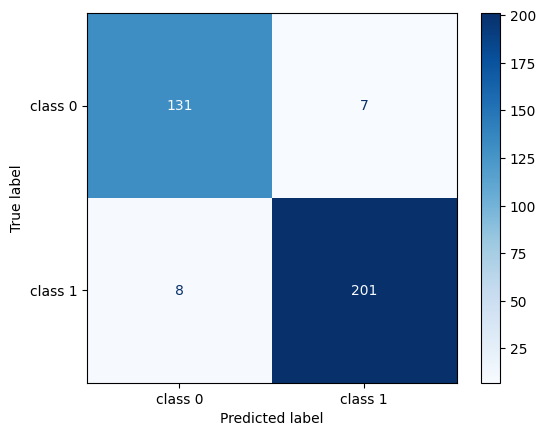

In [46]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters={'C':np.logspace(-3,3,20), 'penalty':["l1","l2","elasticnet"]}# l1 lasso l2 ridge
rlrs=RandomizedSearchCV(LogisticRegression(solver='saga'),  
                          parameters,cv=5, n_jobs=-1, verbose=3, random_state=42)
# fit on the trainning dataset
rlrs.fit(df_X_train_stand,y_train)
tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)
print("tuned hpyerparameters :(best parameters) ",rlrs.best_params_)
print("Score:",rlrs.best_score_)
y_predrlrs = rlrs.predict(df_X_test_stand)
#performance results
print(classification_report(y_test, y_predrlrs, target_names=target_names))

cm = confusion_matrix(y_test, y_predrlrs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [47]:
df_resultados = pd.DataFrame({
    'Clase': A_test,
    'Real': y_test,
    'Predicción': y_predrlrs
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]


R_totales = pd.DataFrame()
R_aciertos =pd.DataFrame()
R_errores=  pd.DataFrame()

val='Primero'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")


Totales por clase: 
 4    198
3      5
0    138
5      4
1      1
2      1
Name: Primero, dtype: int64
Aciertos de Predicción:
 4    191
0    131
3      4
5      4
1      1
2      1
Name: Primero, dtype: int64
Errores de Predicción:
 3    1
4    7
0    7
Name: Primero, dtype: int64
Total Correctas: 332, Total Errores: 15


In [48]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predrlrs))

El coeficiente de correlacion de Matthews es de  0.9098943553506141


### Grid Search and Recursive Feature Elimination

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Elapsed time: 16.42 min.
              precision    recall  f1-score   support

     class 0       0.96      0.95      0.95       138
     class 1       0.97      0.97      0.97       209

    accuracy                           0.96       347
   macro avg       0.96      0.96      0.96       347
weighted avg       0.96      0.96      0.96       347



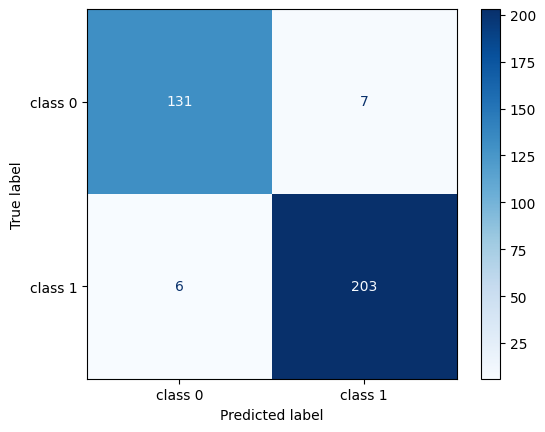

In [49]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
estimator = LogisticRegression(class_weight='balanced', solver='saga',max_iter=5000)

# Inicializar el selector RFECV
selector = RFECV(estimator, step=0.1, cv=5, scoring='f1_macro', n_jobs=-1)

# Definir el espacio de búsqueda de parámetros para Randomized Search
parameters = {
    'estimator__C': np.logspace(-3, 3, 15),  # Hiperparámetro de regularización para la regresión logística
    'estimator__penalty': ["l1", "l2"],  # Tipo de penalización para la regresión logística
}

# Inicializar Randomized Search con Cross Validation
rlgs = GridSearchCV(selector, parameters, cv=5, n_jobs=-1, verbose=3,scoring='f1_macro')

# Ajustar Randomized Search a los datos de entrenamiento
rlgs.fit(df_X_train_stand,y_train)

# Obtener el mejor modelo
best_model = rlgs.best_estimator_


tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

y_predrlrsaa = best_model.predict(df_X_test_stand)
#performance results
print(classification_report(y_test, y_predrlrsaa, target_names=target_names))

cm = confusion_matrix(y_test, y_predrlrsaa)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()


In [50]:
# Seleccionar las características en los conjuntos de entrenamiento y prueba utilizando el mejor modelo
X_train_selected = best_model.transform(df_X_train_stand)
X_train_selected=pd.DataFrame(X_train_selected)
X_train_selected.head()


0         1         2         3         4         5         6   \
0 -0.336327 -0.194145 -0.385751  0.062233 -0.257556 -0.114340 -0.525751   
1 -0.393498 -0.278245 -0.490508 -0.513696 -0.580389 -0.657035 -0.682237   
2 -0.393603  0.026619  0.548331 -0.382803 -0.103476 -0.347564  0.203331   
3 -0.393599  0.047644  0.565790 -0.376258 -0.096139 -0.329624  0.217557   
4  0.780130 -0.194145 -0.385751  0.062233 -0.257556  0.666292 -0.204739   

         7         8         9         10        11        12        13  \
0 -0.329897 -0.324188 -0.012982 -0.188774 -0.093626 -0.027441 -0.195225   
1 -0.387470 -0.381020 -0.266818 -0.269630 -0.267392 -0.027441 -0.185385   
2 -0.387577 -0.381015 -0.266766 -0.269461 -0.267392 -0.027441 -0.088712   
3 -0.387573 -0.381012 -0.266735 -0.269360 -0.267392 -0.027441 -0.116213   
4  0.794426  0.864546 -0.012953  0.329751  0.097338 -0.027441 -0.195357   

         14        15        16        17        18        19        20  
0 -0.226699 -0.427644  0.031007 -0.244056 -0.764242 -0.649782 -0.028074  
1 -0.220477 -0.787014 -0.619584 -0.244056  0.290488  2.615610 -0.027455  
2  0.002195 -0.023113 -0.008417 -0.244056 -0.764242 -0.649782 -0.028074  
3 -0.054342 -0.003896 -0.008417 -0.244056 -0.764242 -0.649782 -0.028074  
4 -0.226916  0.214104  0.123097 -0.244056 -0.764242 -0.649782 -0.028074

In [51]:
# Recuperar los nombres de las características originales
feature_names = df_X_train_stand.columns

# Recuperar los índices de las características seleccionadas
selected_feature_indices = [i for i, selected in enumerate(best_model.support_) if selected]

# Recuperar los nombres de las características seleccionadas
selected_feature_names = feature_names[selected_feature_indices]


In [52]:
X_train_selected=X_train_selected.set_axis(selected_feature_names, axis=1)

#### VIF RFE 

Revisamos la multicolinealidad de nuestras features seleccionadas por el metodo RFE

In [53]:
# VIF dataframe
vif_datarfe = pd.DataFrame()
vif_datarfe["feature"] = X_train_selected.columns

# calcular VIF de cada característica
vif_datarfe["VIF"] = [variance_inflation_factor(X_train_selected.values, i)
    for i in range(len(X_train_selected.columns))]

print(vif_datarfe)

               feature            VIF
0         flowduration     136.996730
1            min_fpktl       8.790879
2            min_bpktl      14.770830
3            max_fpktl      12.842489
4            max_bpktl       9.515153
5           mean_fpktl      19.036474
6           mean_bpktl      26.162393
7           total_fipt     113.717467
8           total_bipt      22.354677
9             max_bipt       8.419206
10           mean_bipt       2.956233
11            std_bipt      11.991799
12            fpsh_cnt  370059.657416
13      fPktsPerSecond       7.853946
14  flowBytesPerSecond       7.986342
15       mean_flowpktl      18.113188
16        std_flowpktl      11.881124
17            flow_fin       2.675344
18            flow_syn       3.219846
19            flow_rst       2.803985
20            flow_ack  370140.701582


Observamos que se encuentran elevadas las features mean_fpktl y mean_flowpktl, procedemos a eliminar una de ellas para comprobar la multicolinealidad nuevamente

In [60]:
X_train_rfeprueba=X_train_selected.drop(['fpsh_cnt','total_fipt','mean_bpktl','total_bipt','mean_fpktl','max_fpktl','std_bipt'],axis=1) 

# VIF dataframe
vif_datarfe = pd.DataFrame()
vif_datarfe["feature"] = X_train_rfeprueba.columns

# calcular VIF de cada característica
vif_datarfe["VIF"] = [variance_inflation_factor(X_train_rfeprueba.values, i)
    for i in range(len(X_train_rfeprueba.columns))]

print(vif_datarfe)
vif_datarfe.columns

               feature       VIF
0         flowduration  3.082170
1            min_fpktl  2.631237
2            min_bpktl  2.990661
3            max_bpktl  7.073622
4             max_bipt  3.134724
5            mean_bipt  2.850241
6       fPktsPerSecond  7.724242
7   flowBytesPerSecond  7.810500
8        mean_flowpktl  4.961262
9         std_flowpktl  7.653420
10            flow_fin  2.284333
11            flow_syn  3.080775
12            flow_rst  2.722319
13            flow_ack  1.080956


Index(['feature', 'VIF'], dtype='object')

Al eliminar las columnas de **mean_fpktl** y **std_flowpktl** se redujo la multicolinealidad a niveles aceptables <5, aplicamos los cambios al conjunto de entrenamiento y testing 

Dado que se redujeron las features volvemos a realizar el preprocesamiento de los datos para descartar datos duplicados.

In [ ]:
X_train_rfeprueba.columns

In [61]:
dfrfe=df_train_f.copy()
dfrfe=dfrfe.drop(['label','Ataque'],axis=1)
print(dfrfe.shape)
print("NaN, :", df_train_f['label'].isna().sum())

dfrfe = best_model.transform(dfrfe)
dfrfe=pd.DataFrame(dfrfe)
dfrfe=dfrfe.set_axis(selected_feature_names,axis=1)
dfrfe=dfrfe.drop(['fpsh_cnt','total_fipt','mean_bpktl','total_bipt','mean_fpktl','max_fpktl','std_bipt'],axis=1) 

#dfrfe=dfrfe[['min_fpktl','total_bpackets', 'min_bpktl', 'max_bpktl', 'total_bipt', 'fPktsPerSecond','mean_flowpktl', 'flow_syn', 'flow_rst']].copy()

dfrfe.reset_index(drop=True, inplace=True)
df_train_f.reset_index(drop=True, inplace=True)
print(dfrfe.shape)
dfrfe['label1']=df_train_f['label'].astype('int')
dfrfe['Ataque']=df_train_f['Ataque'].astype('int')
print(dfrfe.shape)

print(dfrfe.duplicated().sum())
dfrfe=dfrfe.drop_duplicates()
print("Dimensiones subconjunto RFE: ", dfrfe.shape)
print("NaN, :", dfrfe['label1'].isna().sum())

#Splitting
X_train_rfe,X_test_rfe,y_trainrfe,y_testrfe = train_test_split(dfrfe.drop(columns=['label1']), dfrfe['label1'], test_size=0.3, random_state=42)
print(X_train_rfe.shape)
X_test_rfe
RFE_train=X_train_rfe['Ataque']
RFE_test=X_test_rfe['Ataque']
print("Antes    X_train_rfe: ", X_train_rfe.shape, "X_test_rfe: ", X_test_rfe.shape)
X_train_rfe=X_train_rfe.drop(['Ataque'],axis=1)
X_test_rfe=X_test_rfe.drop(['Ataque'],axis=1)
print("Despues  X_train_rfe: ", X_train_rfe.shape, "X_test_rfe: ", X_test_rfe.shape)
print("RFE_train: ", RFE_train.shape, "RFE_test: ", RFE_test.shape)

#Estandarizacion
numeric_cols = X_train_rfe.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

labels=list(X_train_rfe.columns.values.tolist())
# fit on the trainning dataset
preprocessor.fit_transform(X_train_rfe)
X_train_rfe = preprocessor.transform(X_train_rfe)
X_test_rfe  = preprocessor.transform(X_test_rfe)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.
X_train_rfe=pd.DataFrame(X_train_rfe,columns=labels)
X_test_rfe=pd.DataFrame(X_test_rfe,columns=labels)



(1734, 39)
NaN, : 0
(1734, 14)
(1734, 16)
46
Dimensiones subconjunto RFE:  (1688, 16)
NaN, : 0
(1181, 15)
Antes    X_train_rfe:  (1181, 15) X_test_rfe:  (507, 15)
Despues  X_train_rfe:  (1181, 14) X_test_rfe:  (507, 14)
RFE_train:  (1181,) RFE_test:  (507,)


In [62]:
print("Dimensiones trainrfe: ",X_train_rfe.shape, "y test: ", X_test_rfe.shape)
print(y_trainrfe.shape)
print(y_testrfe.shape)
X_test_rfe.head()


Dimensiones trainrfe:  (1181, 14) y test:  (507, 14)
(1181,)
(507,)


flowduration  min_fpktl  min_bpktl  max_bpktl  max_bipt  mean_bipt  \
0     -0.392446  -0.297405  -0.503454  -0.536750 -0.271615  -0.281160   
1     -0.392451  -0.297405  -0.503454  -0.579403 -0.271657  -0.281297   
2     -0.392446  -0.297405  -0.468081  -0.565186 -0.271657  -0.281297   
3     -0.392150  -0.297405  -0.503454   1.244023 -0.269311  -0.278013   
4     -0.392447  -0.297405  -0.468081  -0.565186 -0.271657  -0.281297   

   fPktsPerSecond  flowBytesPerSecond  mean_flowpktl  std_flowpktl  flow_fin  \
0        0.223823            0.156722      -0.674339     -0.430213 -0.241864   
1        9.568769            8.149366      -0.824832     -0.627085 -0.241864   
2        0.086836           -0.033418      -0.797716     -0.600974 -0.241864   
3       -0.182796           -0.205033      -0.109225      1.397318  2.600336   
4        0.096802           -0.026692      -0.797716     -0.600974 -0.241864   

   flow_syn  flow_rst  flow_ack  
0  1.332566  0.966262 -0.040288  
1  0.297197  0.966262 -0.041501  
2  1.332566  0.966262 -0.041501  
3  1.332566 -0.631995 -0.039076  
4  1.332566  0.966262 -0.041501

#### Entrenando modelo con RFE

In [63]:
start=perf_counter()

# Entrenar el modelo de regresión logística con las características seleccionadas y los hiperparámetros óptimos
model = LogisticRegression(C=rlgs.best_params_['estimator__C'], penalty=rlgs.best_params_['estimator__penalty'],
                           class_weight='balanced', solver='saga', max_iter=1500)
model.fit(X_train_rfe, y_trainrfe)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Predecir y evaluar el modelo
y_predrlgs = model.predict(X_test_rfe)
accuracy = roc_auc_score(y_testrfe, y_predrlgs)
print("Best Parameters:", rlgs.best_params_)
print("Score:", rlgs.best_score_)

Elapsed time: 0.01 min.
Best Parameters: {'estimator__C': np.float64(1.0), 'estimator__penalty': 'l1'}
Score: 0.9659563513034598


              precision    recall  f1-score   support

     class 0       0.95      0.95      0.95       225
     class 1       0.96      0.96      0.96       282

    accuracy                           0.96       507
   macro avg       0.96      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507



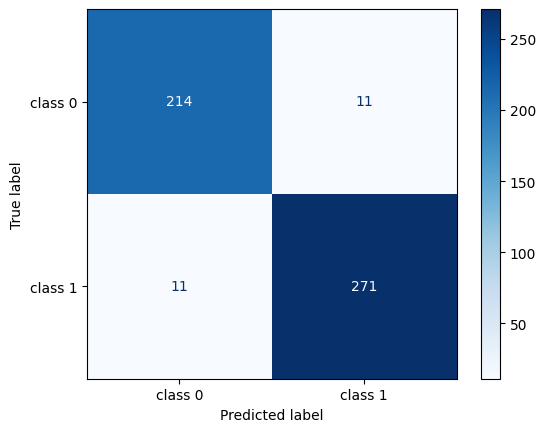

In [64]:
#performance results
print(classification_report(y_testrfe, y_predrlgs, target_names=target_names))

cm = confusion_matrix(y_testrfe, y_predrlgs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [65]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predrlgs
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Segundo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")


Totales por clase: 
 4    261
3      6
0    225
5     10
1      3
2      2
Name: Segundo, dtype: int64
Aciertos de Predicción:
 4    251
0    214
3      5
5     10
1      3
2      2
Name: Segundo, dtype: int64
Errores de Predicción:
 3     1
4    10
0    11
Name: Segundo, dtype: int64
Total Correctas: 485, Total Errores: 22


In [66]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predrlgs))

El coeficiente de correlacion de Matthews es de  0.9121040189125296


### RL con Optuna sin RFE

In [67]:
start=perf_counter()
# Define la función objetivo
def objective(trial):
    # Define el espacio de búsqueda de hiperparámetros
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform("C", 1e-2, 1000)

    # Crea el modelo con los hiperparámetros sugeridos
    rlo = LogisticRegression(penalty=penalty, C=C, solver='saga',random_state=42)

    # Entrena el modelo
    rlo.fit(df_X_train_stand,y_train)

    # Predice en el conjunto de prueba
    y_predrlo = rlo.predict(df_X_test_stand)

    # Calcula la métrica de rendimiento (recall)
    lloss = log_loss(y_test, y_predrlo)

    return lloss


In [68]:
# Crea el estudio de optimización
optuna.logging.set_verbosity(optuna.logging.WARNING) # i do not want to see trail information
study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(objective, n_trials=300)

# Obtiene los mejores hiperparámetros
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Entrena el modelo con los mejores hiperparámetros encontrados
best_modelrlo = LogisticRegression(**best_params, solver='saga',random_state=42)
best_modelrlo.fit(df_X_train_stand, y_train)

# Predice en el conjunto de prueba

y_predbrlo = best_modelrlo.predict(df_X_test_stand)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Mejores hiperparámetros: {'penalty': 'l1', 'C': 4.19424733885903}
Elapsed time: 0.38 min.


              precision    recall  f1-score   support

     class 0       0.94      0.95      0.95       138
     class 1       0.97      0.96      0.96       209

    accuracy                           0.96       347
   macro avg       0.95      0.96      0.95       347
weighted avg       0.96      0.96      0.96       347



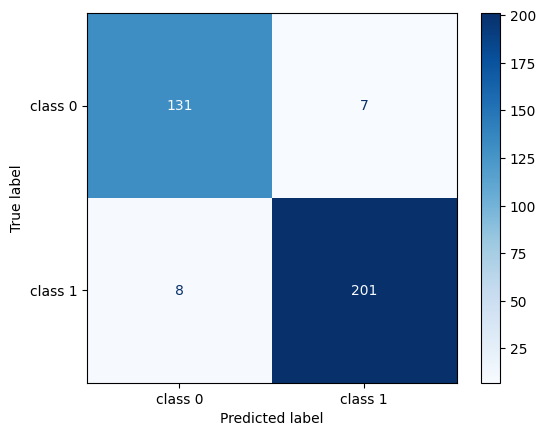

In [69]:
#performance results
print(classification_report(y_test, y_predbrlo, target_names=target_names))

cm = confusion_matrix(y_test, y_predbrlo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [70]:
df_resultados = pd.DataFrame({
    'Clase': A_test,
    'Real': y_test,
    'Predicción': y_predbrlo
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Tercero'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    198
3      5
0    138
5      4
1      1
2      1
Name: Tercero, dtype: int64
Aciertos de Predicción:
 4    191
0    131
3      4
5      4
1      1
2      1
Name: Tercero, dtype: int64
Errores de Predicción:
 3    1
4    7
0    7
Name: Tercero, dtype: int64
Total Correctas: 332, Total Errores: 15


In [71]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predbrlo))

El coeficiente de correlacion de Matthews es de  0.9098943553506141


### RL con Optuna y RFE

In [72]:
start=perf_counter()
# Define la función objetivo
def objective(trial):
    # Define el espacio de búsqueda de hiperparámetros
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform("C", 1e-3, 100)

    # Crea el modelo con los hiperparámetros sugeridos
    rlo = LogisticRegression(penalty=penalty, C=C, solver='saga',random_state=42)

    # Entrena el modelo
    rlo.fit(X_train_rfe,y_trainrfe)

    # Predice en el conjunto de prueba
    y_predrlorfe = rlo.predict(X_test_rfe)

    # Calcula la métrica de rendimiento (recall)
    scorerfe = matthews_corrcoef(y_testrfe, y_predrlorfe)

    return scorerfe


Mejores hiperparámetros: {'penalty': 'l2', 'C': 4.5705630998014515}
Elapsed time: 0.25 min.
              precision    recall  f1-score   support

     class 0       0.95      0.95      0.95       225
     class 1       0.96      0.96      0.96       282

    accuracy                           0.95       507
   macro avg       0.95      0.95      0.95       507
weighted avg       0.95      0.95      0.95       507



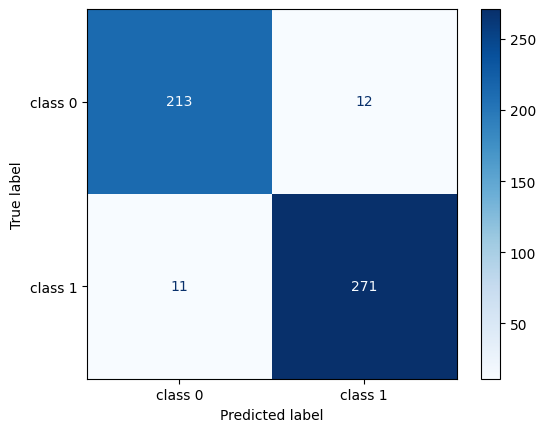

In [73]:
# Crea el estudio de optimización
optuna.logging.set_verbosity(optuna.logging.WARNING) # i do not want to see trail information
studyrl = optuna.create_study(direction='maximize',sampler=TPESampler(seed=42))
studyrl.optimize(objective, n_trials=500)

# Obtiene los mejores hiperparámetros
best_paramsr = studyrl.best_params
print("Mejores hiperparámetros:", best_paramsr)

# Entrena el modelo con los mejores hiperparámetros encontrados
best_modelrlo = LogisticRegression(**best_paramsr, solver='saga',)
best_modelrlo.fit(X_train_rfe, y_trainrfe)

# Predice en el conjunto de prueba

y_predbrlorfe = best_modelrlo.predict(X_test_rfe)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

#performance results
print(classification_report(y_testrfe, y_predbrlorfe, target_names=target_names))

cm = confusion_matrix(y_testrfe, y_predbrlorfe)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [74]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predbrlorfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Cuarto'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    261
3      6
0    225
5     10
1      3
2      2
Name: Cuarto, dtype: int64
Aciertos de Predicción:
 4    251
0    213
3      5
5     10
1      3
2      2
Name: Cuarto, dtype: int64
Errores de Predicción:
 3     1
4    10
0    12
Name: Cuarto, dtype: int64
Total Correctas: 484, Total Errores: 23


In [75]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predbrlorfe))

El coeficiente de correlacion de Matthews es de  0.9080747074439756


## Decision Tree

### Sin Feature Importances

In [76]:
start=perf_counter()

# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(random_state=42)
dt.fit(df_X_train_stand, y_train)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Elapsed time: 0.00 min.


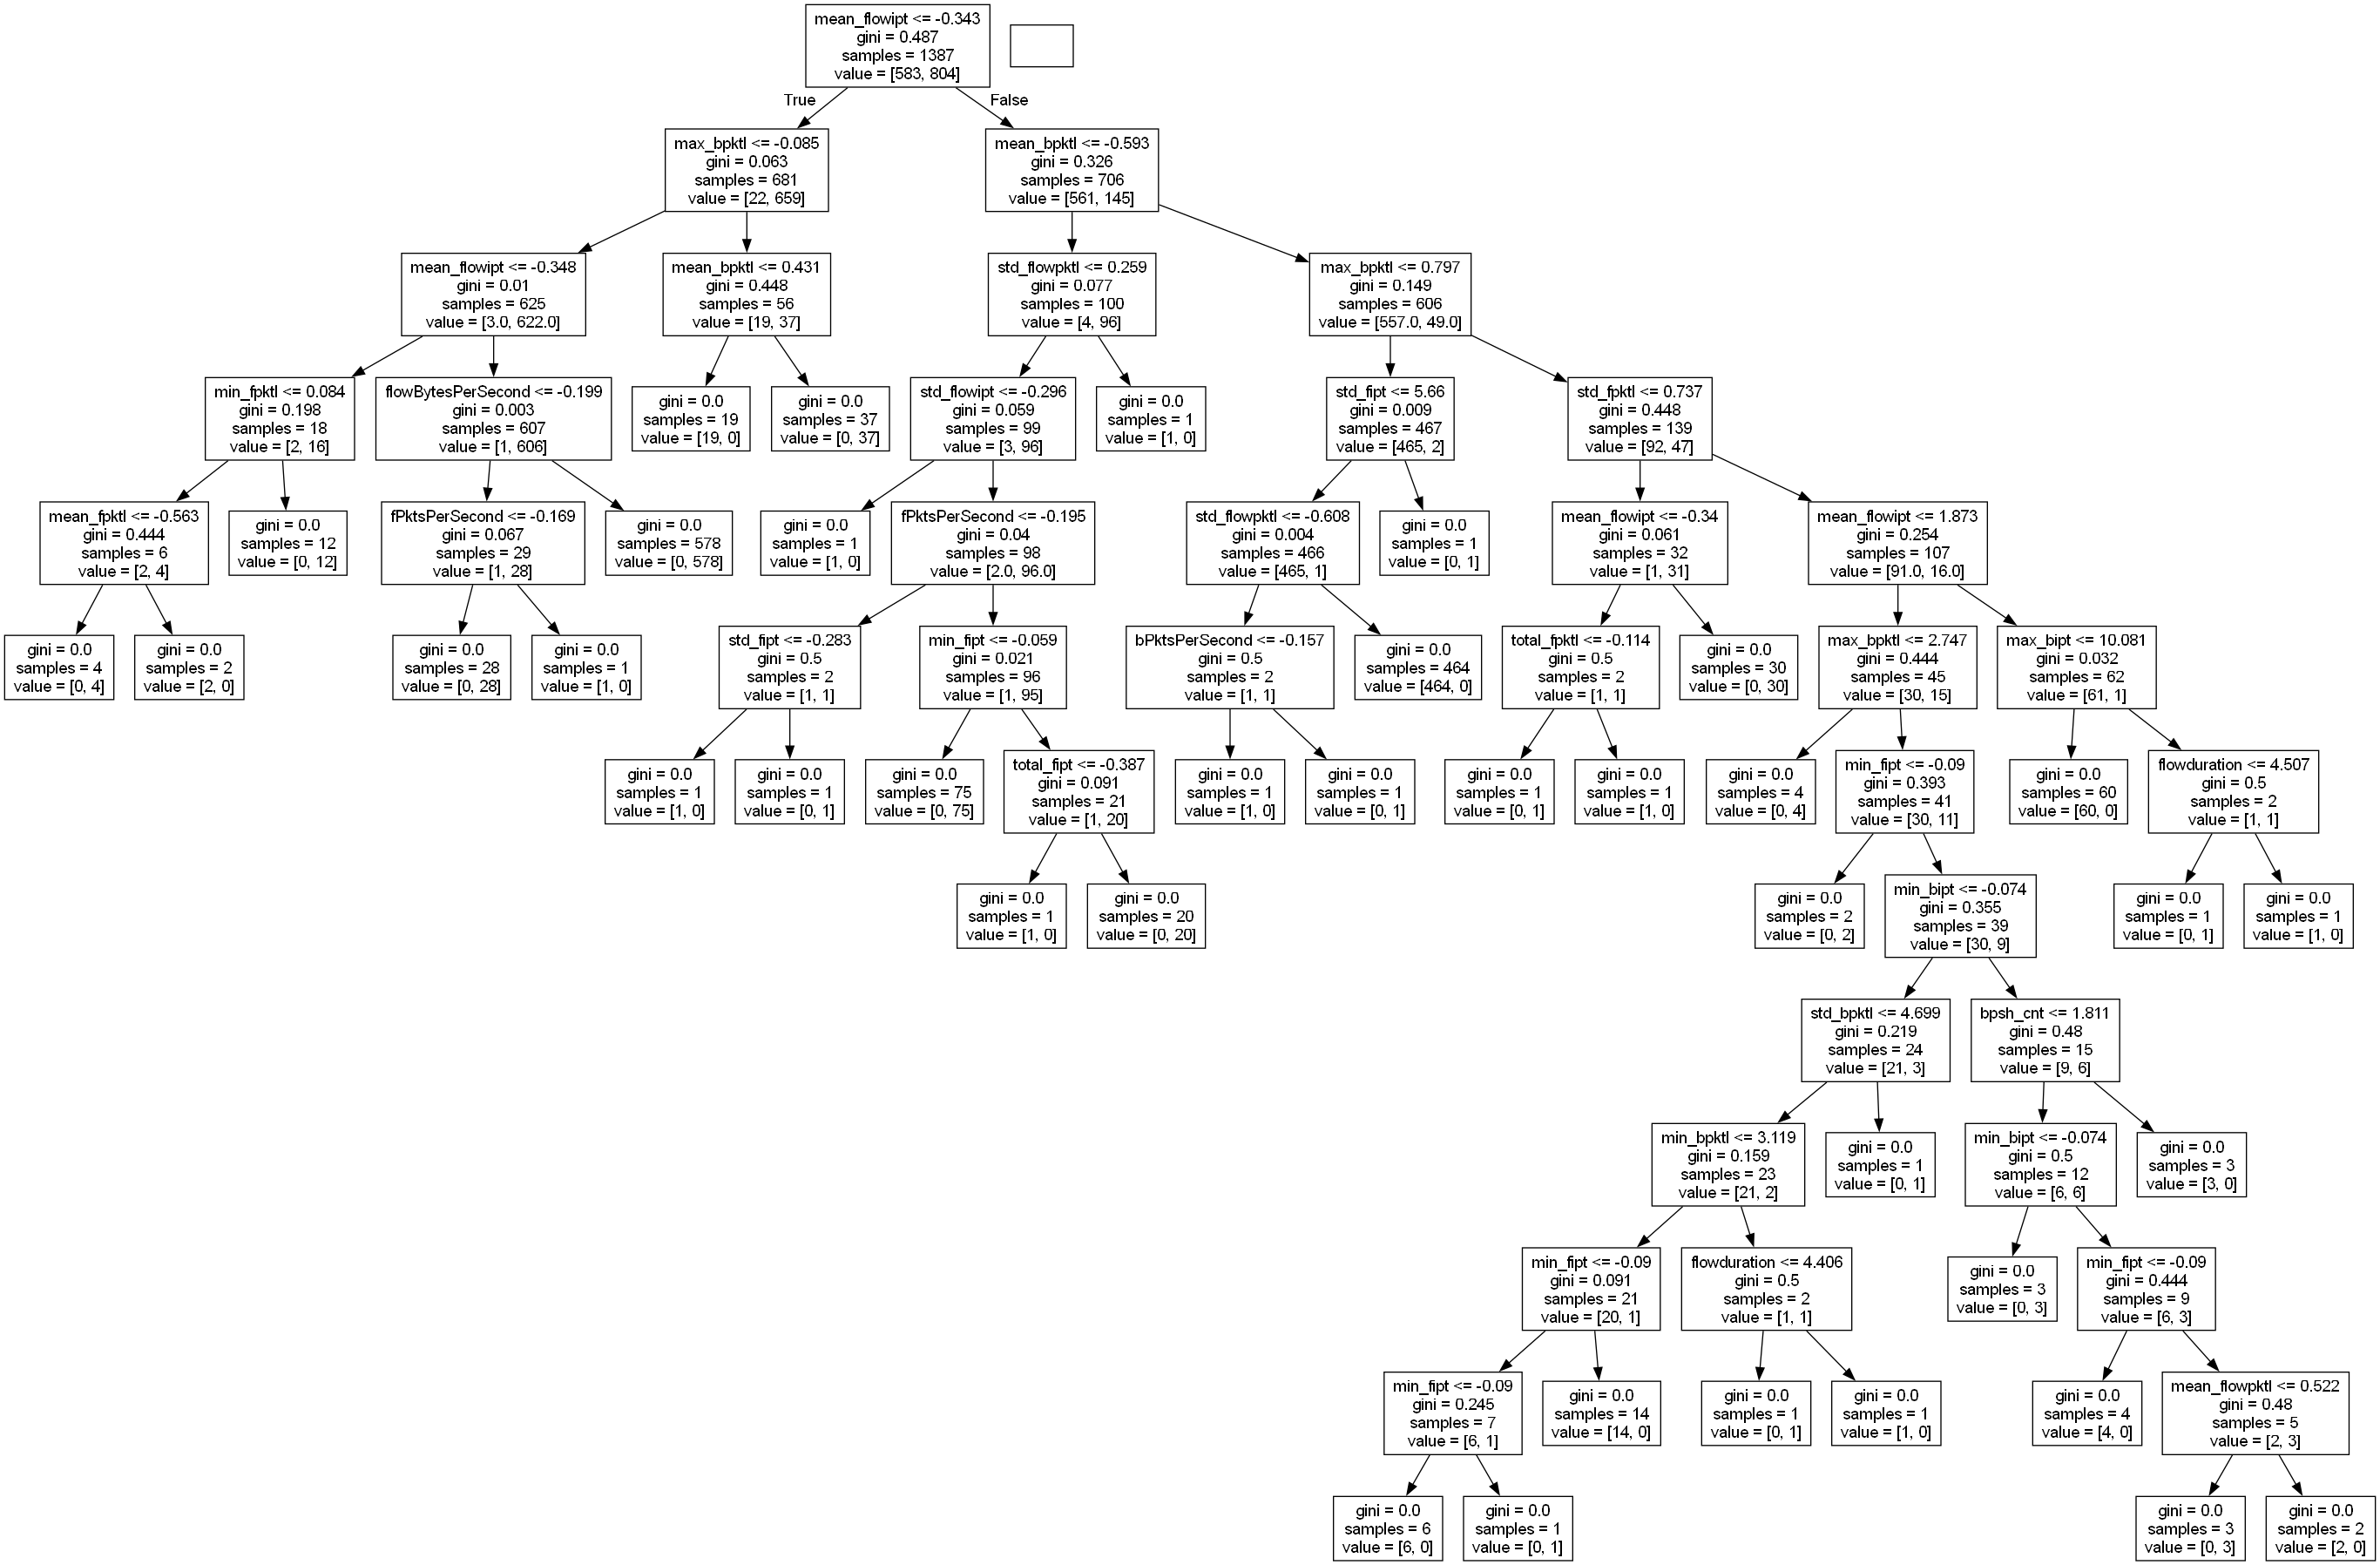

In [77]:
# Conjunto de variables predictoras
X = df_train_f.copy()
X.drop(['label', 'Ataque'],axis=1,inplace=True)

features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [78]:
# Testing model
y_preddt = dt.predict(df_X_test_stand)
y_probdt = dt.predict_proba(df_X_test_stand)
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_preddt, y_test))

Accuracy of Decision Tree-Test:  0.968299711815562


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       138
           1       0.99      0.96      0.97       209

    accuracy                           0.97       347
   macro avg       0.96      0.97      0.97       347
weighted avg       0.97      0.97      0.97       347



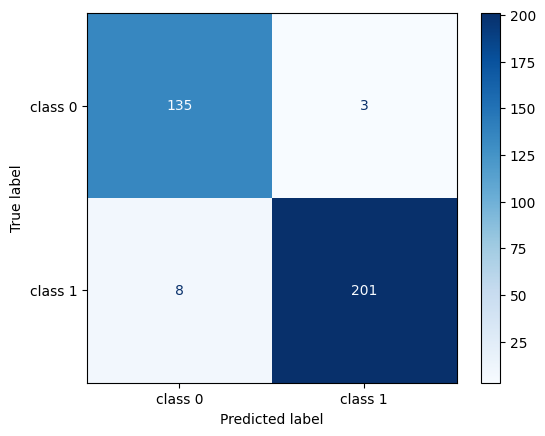

In [79]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_preddt))
ConfusionMatrixDisplay.from_predictions(y_test, y_preddt, display_labels=target_names, cmap=plt.cm.Blues)

In [80]:
df_resultados = pd.DataFrame({
    'Clase': A_test,
    'Real': y_test,
    'Predicción': y_preddt
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Quinto'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    198
3      5
0    138
5      4
1      1
2      1
Name: Quinto, dtype: int64
Aciertos de Predicción:
 4    191
0    135
3      4
5      4
1      1
2      1
Name: Quinto, dtype: int64
Errores de Predicción:
 3    1
4    7
0    3
Name: Quinto, dtype: int64
Total Correctas: 336, Total Errores: 11


In [81]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_preddt))

El coeficiente de correlacion de Matthews es de  0.9346515882341419


### Con Feature Importances

Calculamos la `feature_iportances_` obtenida con el modelo anterior

In [82]:
df_X_test_stand.columns[:]

Index(['flowduration', 'total_fpackets', 'total_bpackets', 'total_fpktl',
       'total_bpktl', 'min_fpktl', 'min_bpktl', 'max_fpktl', 'max_bpktl',
       'mean_fpktl', 'mean_bpktl', 'std_fpktl', 'std_bpktl', 'total_fipt',
       'total_bipt', 'min_fipt', 'min_bipt', 'max_fipt', 'max_bipt',
       'mean_fipt', 'mean_bipt', 'std_fipt', 'std_bipt', 'fpsh_cnt',
       'bpsh_cnt', 'total_fhlen', 'total_bhlen', 'fPktsPerSecond',
       'bPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl',
       'mean_flowipt', 'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst',
       'flow_ack', 'downUpRatio'],
      dtype='object')

In [83]:
feature_importances = dt.feature_importances_
feature_importances = pd.DataFrame([feature_importances], columns=df_X_test_stand.columns[:])


Creamos un duplicado de nuestros conjuntos de entrenamiento y testing

In [84]:
feature_importances


flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0      0.002959             0.0             0.0      0.00148          0.0   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0   0.001315   0.001106        0.0   0.058115    0.003945    0.233454   

   std_fpktl  std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  max_fipt  \
0   0.048918   0.002364    0.002818         0.0  0.008626  0.005025       0.0   

   max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  bpsh_cnt  \
0  0.001432        0.0        0.0   0.00442       0.0       0.0  0.001775   

   total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0          0.0          0.0        0.004247         0.00148   

   flowBytesPerSecond  mean_flowpktl  std_flowpktl  mean_flowipt  std_flowipt  \
0            0.000097       0.003551      0.004228      0.605834     0.002811   

   flow_fin  flow_syn  flow_rst  flow_ack  downUpRatio  
0       0.0       0.0       0.0       0.0          0.0

Ordenamos por importancia

In [85]:
feature_importances_transposed = feature_importances.transpose()

# Renombrar la columna
feature_importances_transposed.columns = ['importance']

# Ordenar las características de mayor a menor importancia
sorted_features = feature_importances_transposed.sort_values(by='importance', ascending=False)

sorted_features=sorted_features.transpose()
sorted_features

mean_flowipt  mean_bpktl  max_bpktl  std_fpktl  min_fipt  \
importance      0.605834    0.233454   0.058115   0.048918  0.008626   

            min_bipt  std_fipt  fPktsPerSecond  std_flowpktl  mean_fpktl  \
importance  0.005025   0.00442        0.004247      0.004228    0.003945   

            mean_flowpktl  flowduration  total_fipt  std_flowipt  std_bpktl  \
importance       0.003551      0.002959    0.002818     0.002811   0.002364   

            bpsh_cnt  total_fpktl  bPktsPerSecond  max_bipt  min_fpktl  \
importance  0.001775      0.00148         0.00148  0.001432   0.001315   

            min_bpktl  flowBytesPerSecond  total_fpackets  total_bpktl  \
importance   0.001106            0.000097             0.0          0.0   

            total_bpackets  std_bipt  mean_bipt  max_fpktl  total_bipt  \
importance             0.0       0.0        0.0        0.0         0.0   

            mean_fipt  max_fipt  total_fhlen  fpsh_cnt  total_bhlen  flow_fin  \
importance        0.0       0.0          0.0       0.0          0.0       0.0   

            flow_syn  flow_rst  flow_ack  downUpRatio  
importance       0.0       0.0       0.0          0.0

Aplicamos el siguiente ciclo for para eliminar las columnas con una importancia de 0

In [86]:
Xfitrain = pd.DataFrame()
Xfitest  = pd.DataFrame()
fidt     = pd.DataFrame()
dffi     = pd.DataFrame()

ncol=feature_importances.shape[1]

for i in range(0, ncol):
    if(feature_importances.at[0,feature_importances.columns[i]]>0):
        Xfitrain[feature_importances.columns[i]]= df_X_train_stand[feature_importances.columns[i]]
        Xfitest[feature_importances.columns[i]]= df_X_test_stand[feature_importances.columns[i]]
        dffi[feature_importances.columns[i]]= df_train_f[feature_importances.columns[i]]
        fidt[feature_importances.columns[i]] = feature_importances[feature_importances.columns[i]]

print(feature_importances.shape)
fidt

(1, 39)


flowduration  total_fpktl  min_fpktl  min_bpktl  max_bpktl  mean_fpktl  \
0      0.002959      0.00148   0.001315   0.001106   0.058115    0.003945   

   mean_bpktl  std_fpktl  std_bpktl  total_fipt  min_fipt  min_bipt  max_bipt  \
0    0.233454   0.048918   0.002364    0.002818  0.008626  0.005025  0.001432   

   std_fipt  bpsh_cnt  fPktsPerSecond  bPktsPerSecond  flowBytesPerSecond  \
0   0.00442  0.001775        0.004247         0.00148            0.000097   

   mean_flowpktl  std_flowpktl  mean_flowipt  std_flowipt  
0       0.003551      0.004228      0.605834     0.002811

#### VIF Feature Importance

A las features clasificadas con el metodo `feature_iportances_` le calculamos la multicolinealidad por medio de `VIF`

In [87]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Xfitrain.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(Xfitrain.values, i)
    for i in range(len(Xfitrain.columns))]

print(vif_data)

               feature         VIF
0         flowduration  114.963371
1          total_fpktl    5.697405
2            min_fpktl   18.806906
3            min_bpktl   37.783431
4            max_bpktl   18.741293
5           mean_fpktl   32.210886
6           mean_bpktl   44.373903
7            std_fpktl   17.436687
8            std_bpktl   30.021841
9           total_fipt  114.638147
10            min_fipt   20.931877
11            min_bipt    3.399377
12            max_bipt    2.826684
13            std_fipt   23.727181
14            bpsh_cnt    1.753151
15      fPktsPerSecond  313.631455
16      bPktsPerSecond  246.506219
17  flowBytesPerSecond   15.328220
18       mean_flowpktl   28.197171
19        std_flowpktl   49.743093
20        mean_flowipt   12.207357
21         std_flowipt   51.534120


Observamos niveles altos de multicolinealidad, procedemos a eliminar de manera manual las features con niveles altos de VIF y bajos niveles de importancia

In [88]:
sorted_features

mean_flowipt  mean_bpktl  max_bpktl  std_fpktl  min_fipt  \
importance      0.605834    0.233454   0.058115   0.048918  0.008626   

            min_bipt  std_fipt  fPktsPerSecond  std_flowpktl  mean_fpktl  \
importance  0.005025   0.00442        0.004247      0.004228    0.003945   

            mean_flowpktl  flowduration  total_fipt  std_flowipt  std_bpktl  \
importance       0.003551      0.002959    0.002818     0.002811   0.002364   

            bpsh_cnt  total_fpktl  bPktsPerSecond  max_bipt  min_fpktl  \
importance  0.001775      0.00148         0.00148  0.001432   0.001315   

            min_bpktl  flowBytesPerSecond  total_fpackets  total_bpktl  \
importance   0.001106            0.000097             0.0          0.0   

            total_bpackets  std_bipt  mean_bipt  max_fpktl  total_bipt  \
importance             0.0       0.0        0.0        0.0         0.0   

            mean_fipt  max_fipt  total_fhlen  fpsh_cnt  total_bhlen  flow_fin  \
importance        0.0       0.0          0.0       0.0          0.0       0.0   

            flow_syn  flow_rst  flow_ack  downUpRatio  
importance       0.0       0.0       0.0          0.0

In [115]:
X_fi_prueba=Xfitrain.drop(['fPktsPerSecond','total_fipt','std_flowpktl','std_flowipt','min_bpktl','mean_fpktl','std_fipt','std_bpktl'], axis=1) 

In [116]:
X_fi_prueba.columns

Index(['flowduration', 'total_fpktl', 'min_fpktl', 'max_bpktl', 'mean_bpktl',
       'std_fpktl', 'min_fipt', 'min_bipt', 'max_bipt', 'bpsh_cnt',
       'bPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl',
       'mean_flowipt'],
      dtype='object')

In [117]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_fi_prueba.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(X_fi_prueba.values, i)
    for i in range(len(X_fi_prueba.columns))]

print(vif_data)

               feature       VIF
0         flowduration  4.497652
1          total_fpktl  2.325521
2            min_fpktl  4.577218
3            max_bpktl  3.357257
4           mean_bpktl  5.827171
5            std_fpktl  4.423580
6             min_fipt  4.603085
7             min_bipt  3.255145
8             max_bipt  2.652937
9             bpsh_cnt  1.204889
10      bPktsPerSecond  6.906863
11  flowBytesPerSecond  7.419623
12       mean_flowpktl  7.188393
13        mean_flowipt  5.316823


Reduciendo asi los valores a niveles aceptables de multicolinealidad <5

Dado que se redujeron las features volvemos a realizar el preprocesamiento de los datos para descartar datos duplicados.

In [118]:
dffi=dffi.drop(['fPktsPerSecond','total_fipt','std_flowpktl','std_flowipt','min_bpktl','mean_fpktl','std_fipt','std_bpktl'], axis=1) 
print(dffi.shape)


dffi.reset_index(drop=True, inplace=True)
df_train_f.reset_index(drop=True, inplace=True)
dffi['label']=df_train_f['label'].astype('int')
print("NaN, :", df_train_f['label'].isna().sum())
print("NaNd, :", dffi['label'].isna().sum())

print(dffi.shape)
dffi['Ataque']=df_train_f['Ataque']
print("Con Ataque ", dffi.shape)

print(dffi.duplicated().sum())
dffi=dffi.drop_duplicates()
print("Dimensiones suboconjunto Fi: ", dffi.shape)
print("NaN, :", dffi['label'].isna().sum())

#Splitting
X_train_fi,X_test_fi,y_trainfi,y_testfi = train_test_split(dffi.drop(columns=['label']), dffi['label'], test_size=0.3, random_state=42)

print("Antes X_train_fi: ", X_train_fi.shape, "X_test_fi: ", X_test_fi.shape)
FI_train=X_train_fi['Ataque']
X_train_fi=X_train_fi.drop(['Ataque'],axis=1)
FI_test=X_test_fi['Ataque']
X_test_fi=X_test_fi.drop(['Ataque'],axis=1)
print("Despues X_train_fi: ", X_train_fi.shape, "X_test_fi: ", X_test_fi.shape)
print("Con FI_train: ", FI_train.shape, "FI_test: ", FI_test.shape)

#Estandarizacion
numeric_cols = X_train_fi.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

labels=list(X_train_fi.columns.values.tolist())
# fit on the trainning dataset
preprocessor.fit_transform(X_train_fi)
X_train_fi = preprocessor.transform(X_train_fi)
X_test_fi  = preprocessor.transform(X_test_fi)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.
X_train_fi=pd.DataFrame(X_train_fi,columns=labels)
X_test_fi=pd.DataFrame(X_test_fi,columns=labels)


(1734, 14)
NaN, : 0
NaNd, : 0
(1734, 15)
Con Ataque  (1734, 16)
3
Dimensiones suboconjunto Fi:  (1731, 16)
NaN, : 0
Antes X_train_fi:  (1211, 15) X_test_fi:  (520, 15)
Despues X_train_fi:  (1211, 14) X_test_fi:  (520, 14)
Con FI_train:  (1211,) FI_test:  (520,)


In [119]:
print("Subconjunto Recursive Feature Elimination (RFE): ",dfrfe.shape)
print("Subconjunto Feature Importance (FI): ",dffi.shape)

Subconjunto Recursive Feature Elimination (RFE):  (1688, 16)
Subconjunto Feature Importance (FI):  (1731, 16)


In [120]:
print("Nuevas dimensiones conjunto train: ", X_train_fi.shape, "y test: ", X_test_fi.shape)

Nuevas dimensiones conjunto train:  (1211, 14) y test:  (520, 14)


In [121]:
X_train_fi.head()

flowduration  total_fpktl  min_fpktl  max_bpktl  mean_bpktl  std_fpktl  \
0     -0.392037    -0.110371  -0.290884  -0.559886   -0.644464  -0.445403   
1     -0.392041    -0.110371  -0.290884  -0.559886   -0.644464  -0.445403   
2      0.125720     0.242513  -0.240852   0.018834    0.471260  -0.317890   
3     -0.392033    -0.110351   0.084354  -0.088749    0.225566  -0.382082   
4     -0.391812    -0.110372  -0.290884  -0.574725   -0.673106  -0.481587   

   min_fipt  min_bipt  max_bipt  bpsh_cnt  bPktsPerSecond  flowBytesPerSecond  \
0 -0.088824 -0.070284 -0.266656 -0.029205       -0.097078           -0.130552   
1 -0.089139 -0.070284 -0.266656 -0.029205       -0.028977           -0.036431   
2 -0.089461 -0.070284  0.094966 -0.029205       -0.162221           -0.207412   
3 -0.088666 -0.069911 -0.266596 -0.029205       -0.065779           -0.005096   
4 -0.072109 -0.070284 -0.266656 -0.029205       -0.165290           -0.224998   

   mean_flowpktl  mean_flowipt  
0      -0.786758     -0.367165  
1      -0.786758     -0.367603  
2       0.823435     -0.360795  
3       0.013116     -0.367426  
4      -0.814163     -0.356038

Con esto, volvemos a entrenar el modelo DecisionTree

In [124]:
start=perf_counter()


dtfi = DecisionTreeClassifier(random_state=42)
dtfi.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Elapsed time: 0.00 min.


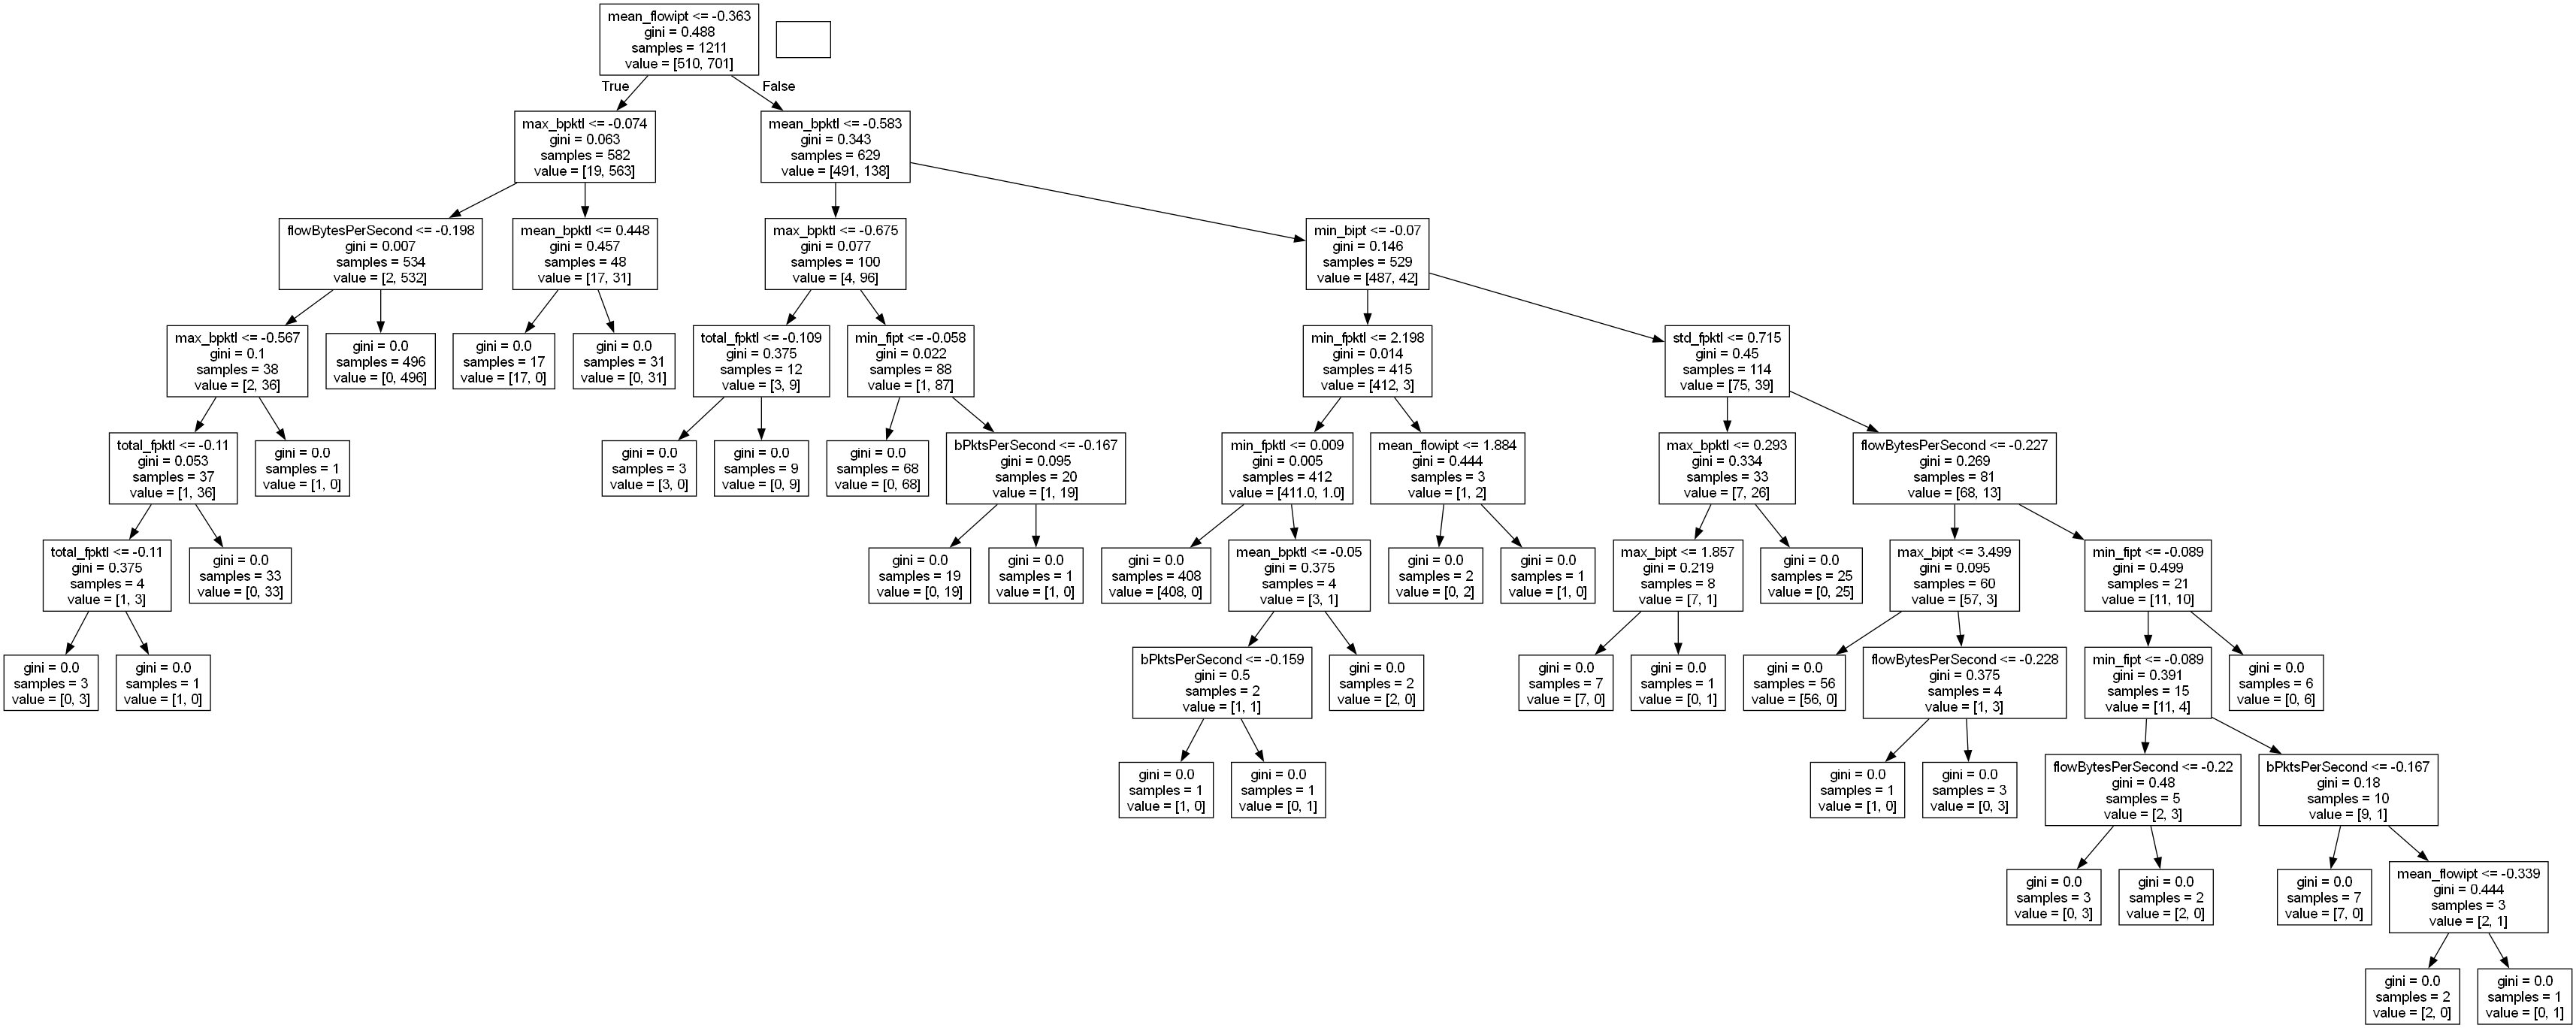

In [125]:
features = X_train_fi.columns
dot_data = export_graphviz(dtfi, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [126]:
# Testing model
y_preddtfi = dtfi.predict(X_test_fi)
y_probdtfi = dtfi.predict_proba(X_test_fi)
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_preddtfi, y_testfi))

Accuracy of Decision Tree-Test:  0.9673076923076923


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       211
           1       0.97      0.97      0.97       309

    accuracy                           0.97       520
   macro avg       0.97      0.97      0.97       520
weighted avg       0.97      0.97      0.97       520



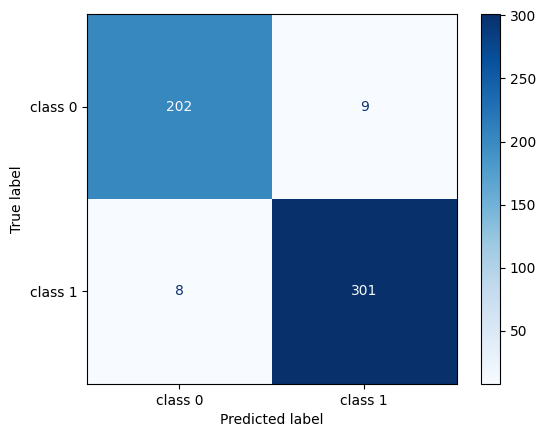

In [127]:
#Classification for test before hyperparameter tuning
print(classification_report(y_testfi,y_preddtfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_preddtfi, display_labels=target_names, cmap=plt.cm.Blues)

In [128]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_preddtfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Sexto'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    286
3      9
0    211
5      9
1      2
2      3
Name: Sexto, dtype: int64
Aciertos de Predicción:
 4    280
0    202
3      7
5      9
1      2
2      3
Name: Sexto, dtype: int64
Errores de Predicción:
 3    2
4    6
0    9
Name: Sexto, dtype: int64
Total Correctas: 503, Total Errores: 17


In [129]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_preddtfi))

El coeficiente de correlacion de Matthews es de  0.9321639848223532


Con la seleccion de features aumentamos la Accuracy del modelo de **0.9635** a **0.9673**, procedemos a implementar tecnicas de optimizacion de hiperparametros buscando hacer el modelo mas eficiente

### DT optimization 

Los hiperparametros que se pueden ajustar en los Arboles de Decision son los siguientes
- min_samples_split – Minimum number of samples a node must possess before splitting.
- min_samples_leaf – Minimum number of samples a leaf node must possess.
- min_weight_fraction_leaf – Minimum fraction of the sum total of weights required to be at a leaf node.
- max_leaf_nodes – Maximum number of leaf nodes a decision tree can have.
- max_features – Maximum number of features that are taken into the account for splitting each node.


In [130]:
# Hyperparameter Tuning of DTC
start=perf_counter()

dtop = DecisionTreeClassifier(class_weight='balanced',random_state=42)

params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth' : ['None',2,3,4,5],
          'min_samples_split': [2,3,4,5],
          'min_samples_leaf': [1,2,3,4,5]}

gsearchdtop = GridSearchCV(dtop, param_grid=params, n_jobs=-1, cv=5)

gsearchdtop.fit(X_train_fi, y_trainfi)

print("Best Parameters:", gsearchdtop.best_params_)

mdtop = DecisionTreeClassifier(criterion=gsearchdtop.best_params_['criterion'], max_depth=gsearchdtop.best_params_['max_depth'], min_samples_split=gsearchdtop.best_params_['min_samples_split'], min_samples_leaf=gsearchdtop.best_params_['min_samples_leaf'], 
                           class_weight='balanced',random_state=42)
mdtop.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Predecir y evaluar el modelo
y_preddtop = mdtop.predict(X_test_fi)
accuracy = accuracy_score(y_testfi, y_preddtop)
print("Accuracy:", accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Elapsed time: 0.17 min.
Accuracy: 0.9730769230769231


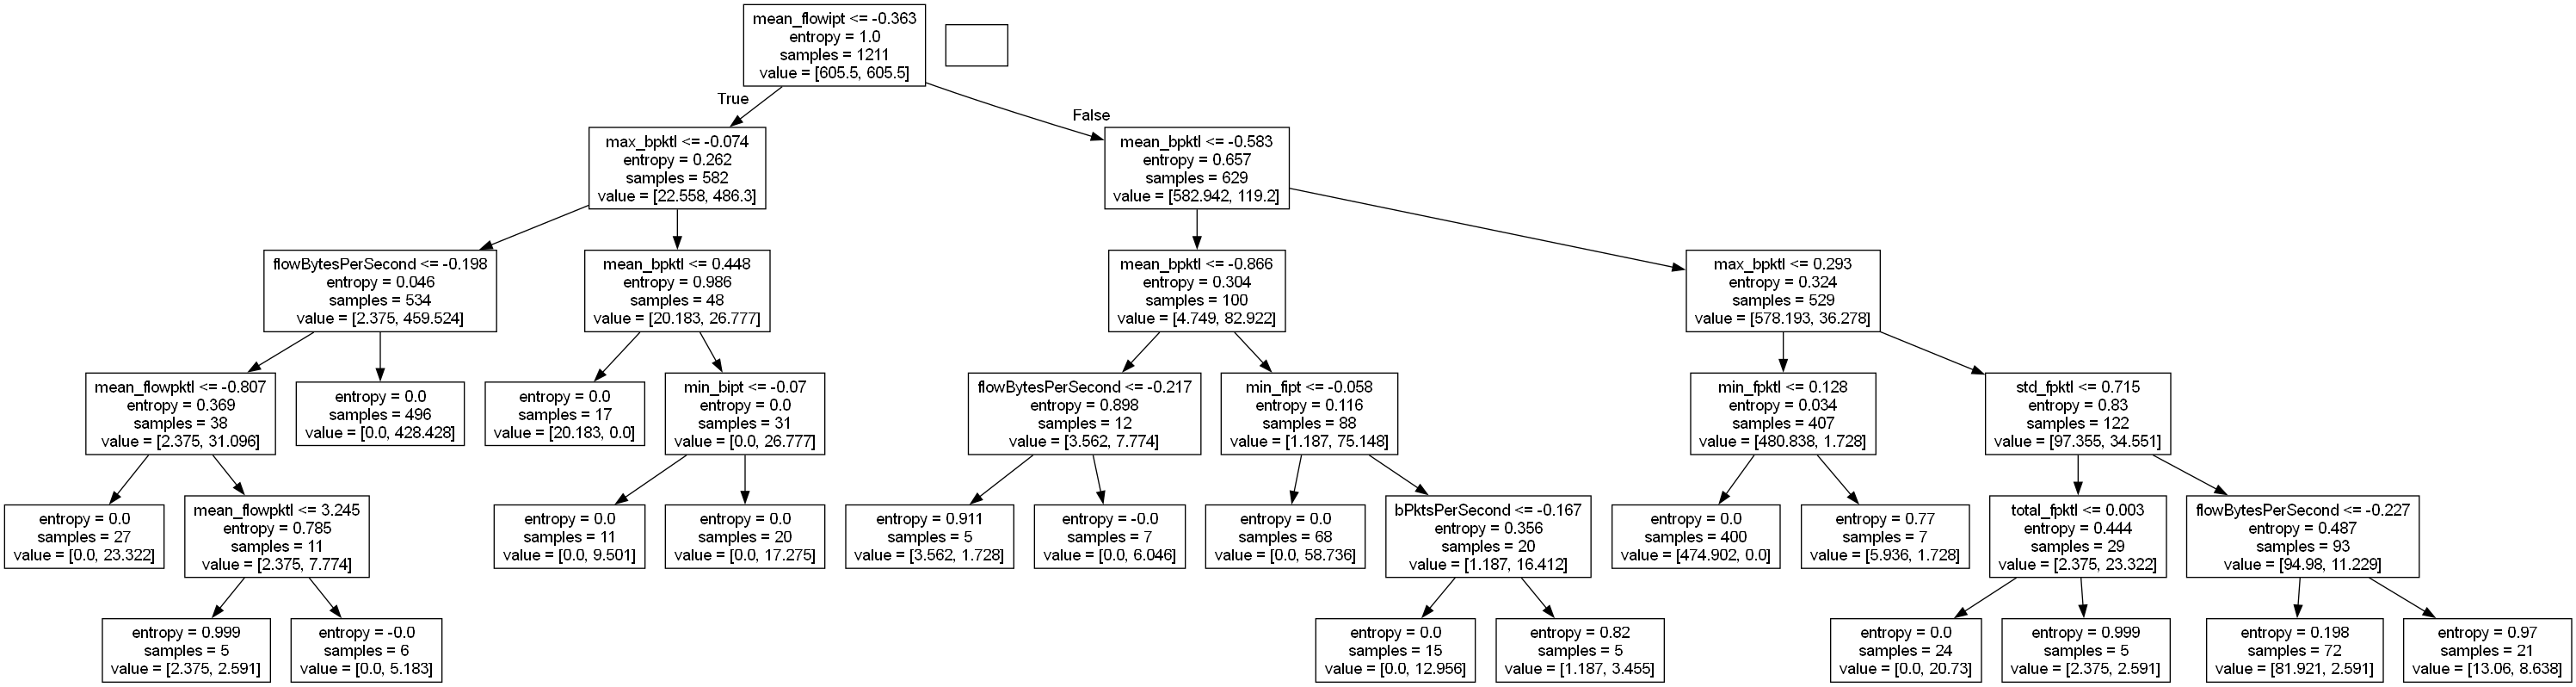

In [131]:
features = X_train_fi.columns
dot_data = export_graphviz(mdtop, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       211
           1       0.99      0.97      0.98       309

    accuracy                           0.97       520
   macro avg       0.97      0.97      0.97       520
weighted avg       0.97      0.97      0.97       520



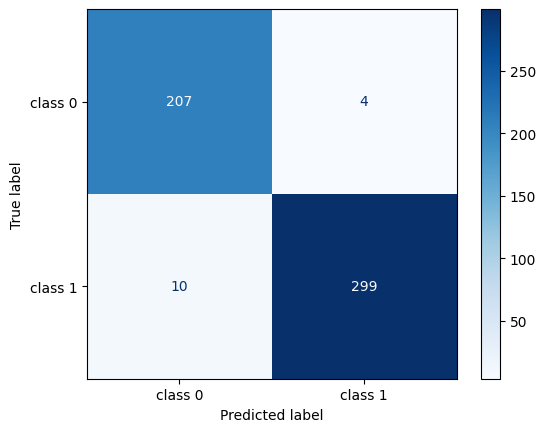

In [132]:
#Classification for test before hyperparameter tuning
print(classification_report(y_testfi,y_preddtop))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_preddtop, display_labels=target_names, cmap=plt.cm.Blues)

In [133]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_preddtop
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Septimo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    286
3      9
0    211
5      9
1      2
2      3
Name: Septimo, dtype: int64
Aciertos de Predicción:
 4    279
0    207
3      7
5      8
1      2
2      3
Name: Septimo, dtype: int64
Errores de Predicción:
 3    2
4    7
0    4
Name: Septimo, dtype: int64
Total Correctas: 506, Total Errores: 14


In [134]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_preddtop))

El coeficiente de correlacion de Matthews es de  0.9446895692335908


## XGBoost

### XGBoost con RFE

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
Elapsed time: 2.29 min.
Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.01), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(2), max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(1000), n_jobs=None,
              num_parallel_tree=None, ...)
Score: 0.9822212686834012
Classification Report:
               precision    recall  f1-sc

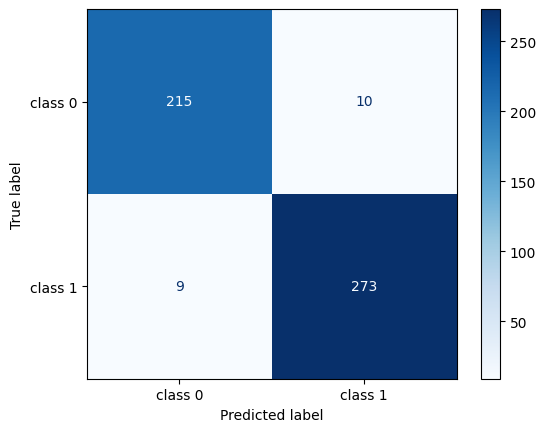

In [135]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
selectxg = XGBClassifier()

# Inicializar el selector RFE

# Definir el espacio de búsqueda de parámetros para Grid Search
parameters = {
    'objective':["binary:logistic","binary:logitraw","binary:hinge"],
    'n_estimators': np.logspace(2, 3, 10).astype(int),
    'max_depth': np.arange(2,10),
    'learning_rate': np.linspace(0.01, 1, 7)
   }

# Inicializar Grid Search con Cross Validation
grid_xgbrfe = GridSearchCV(selectxg, parameters, cv=5, n_jobs=-1, verbose=3)

# Ajustar Grid Search a los datos de entrenamiento
grid_xgbrfe.fit(X_train_rfe, y_trainrfe)

# Obtener el mejor modelo
best_xgbmodelrfe = grid_xgbrfe.best_estimator_


tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)


# Predecir y evaluar el modelo
y_predxgbrfe = grid_xgbrfe.predict(X_test_rfe)
print("Best Parameters:", grid_xgbrfe.best_estimator_)
print("Score:", grid_xgbrfe.best_score_)
print("Classification Report:\n", classification_report(y_testrfe, y_predxgbrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_predxgbrfe, display_labels=target_names, cmap=plt.cm.Blues)

In [136]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predxgbrfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Octavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    261
3      6
0    225
5     10
1      3
2      2
Name: Octavo, dtype: int64
Aciertos de Predicción:
 4    253
0    215
3      5
5     10
1      3
2      2
Name: Octavo, dtype: int64
Errores de Predicción:
 3     1
4     8
0    10
Name: Octavo, dtype: int64
Total Correctas: 488, Total Errores: 19


In [137]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predxgbrfe))

El coeficiente de correlacion de Matthews es de  0.9240631041265855


### XGB con FI

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
Elapsed time: 2.58 min.
Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.01), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(5), max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(129), n_jobs=None,
              num_parallel_tree=None, ...)
Score: 0.981838587899194
Classification Report:
               precision    recall  f1-scor

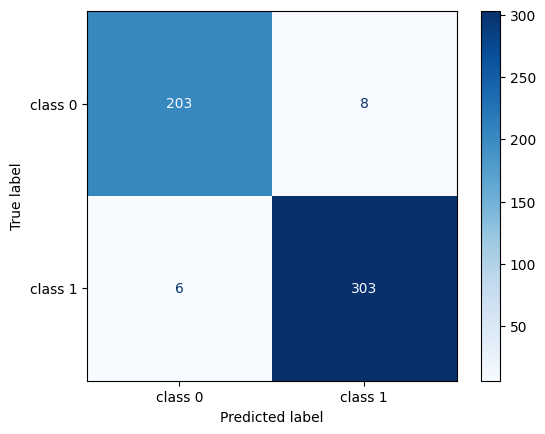

In [138]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
selectxg = XGBClassifier()

# Inicializar el selector RFE

# Definir el espacio de búsqueda de parámetros para Randomized Search
parameters = {
    'objective':['binary:logistic','binary:logitraw','binary:hinge'],
    'n_estimators': np.logspace(2, 3, 10).astype(int),
    'max_depth': np.arange(2,10),
    'learning_rate': np.linspace(0.01, 1, 7)
   }

# Inicializar Randomized Search con Cross Validation
grid_xgbfi = GridSearchCV(selectxg, parameters, cv=5, n_jobs=-1, verbose=3)

# Ajustar Randomized Search a los datos de entrenamiento
grid_xgbfi.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)


# Obtener el mejor modelo
best_xgbmodelfi = grid_xgbfi.best_estimator_


# Predecir y evaluar el modelo
y_predxgbfi = grid_xgbfi.predict(X_test_fi)
accuracy = accuracy_score(y_testfi, y_predxgbfi)
print("Best Parameters:", best_xgbmodelfi)
print("Score:", grid_xgbfi.best_score_)
print("Classification Report:\n", classification_report(y_testfi, y_predxgbfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_predxgbfi, display_labels=target_names, cmap=plt.cm.Blues)

In [139]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predxgbfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Noveno'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    286
3      9
0    211
5      9
1      2
2      3
Name: Noveno, dtype: int64
Aciertos de Predicción:
 4    282
0    203
3      7
5      9
1      2
2      3
Name: Noveno, dtype: int64
Errores de Predicción:
 3    2
4    4
0    8
Name: Noveno, dtype: int64
Total Correctas: 506, Total Errores: 14


In [140]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predxgbfi))

El coeficiente de correlacion de Matthews es de  0.9441169989398148


## Random Forest

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Elapsed time: 0.63 min.
Mejor modelo accuracy score: 0.9731
Mejores parámetros:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': np.int64(100)}
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       211
           1       0.99      0.97      0.98       309

    accuracy                           0.97       520
   macro avg       0.97      0.97      0.97       520
weighted avg       0.97      0.97      0.97       520



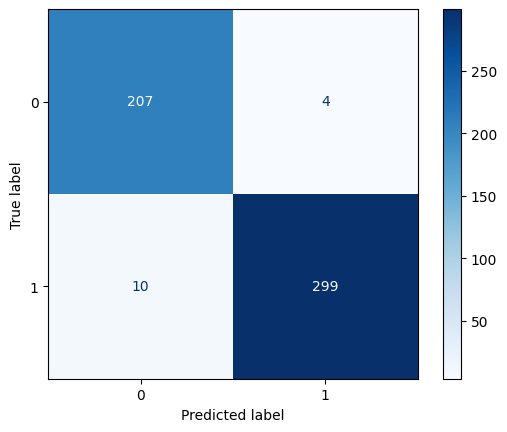

In [141]:

start=perf_counter()

# Define el modelo base a optimizar
clfrf = RandomForestClassifier(random_state=42)

# Define el espacio de búsqueda de parámetros
param_gridrf = {
    'n_estimators': np.linspace(20, 500, 7).astype(int),  # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar en cada división
    'max_depth' : [4,6,8,10],  # Máxima profundidad de cada árbol
    'criterion' :['gini', 'entropy']  # Medidas de calidad de la división
}

# Crear objeto GridSearchCV
grid_searchrf = GridSearchCV(estimator=clfrf, param_grid=param_gridrf, cv=5, verbose=3, n_jobs=-1)

# Entrenarlo
grid_searchrf.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Mejor modelo encontrado
best_clfrf = grid_searchrf.best_estimator_

# Predicciones con el mejor modelo
y_predrf = best_clfrf.predict(X_test_fi)

# Evaluar el mejor modelo
print('Mejor modelo accuracy score: {0:0.4f}'. format(accuracy_score(y_testfi, y_predrf)))
print("Mejores parámetros: ", grid_searchrf.best_params_)

print("Classification Report:\n", classification_report(y_testfi, y_predrf))

# Print the Confusion Matrix and slice it into four pieces

ConfusionMatrixDisplay.from_predictions(y_testfi, y_predrf, cmap=plt.cm.Blues);

In [142]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predrf
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Decimo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    286
3      9
0    211
5      9
1      2
2      3
Name: Decimo, dtype: int64
Aciertos de Predicción:
 4    278
0    207
3      7
5      9
1      2
2      3
Name: Decimo, dtype: int64
Errores de Predicción:
 3    2
4    8
0    4
Name: Decimo, dtype: int64
Total Correctas: 506, Total Errores: 14


In [143]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predrf))

El coeficiente de correlacion de Matthews es de  0.9446895692335908


## Support Vector Machine

### Con Feature Selection de **RFE**

In [144]:
start=perf_counter()

svm=LinearSVC(class_weight='balanced', max_iter=10000, dual=False)
# Definir los parámetros para la búsqueda de malla
param_grid = {
    'C': np.logspace(-3, 3, 30)
}
# Realizar la búsqueda de malla con validación cruzada
grid_searchsvmrfe = RandomizedSearchCV(estimator=svm, param_distributions=param_grid,
    n_iter=100,  
    scoring='f1_macro',
    n_jobs=-1,
    cv=5,
    verbose=3,
    random_state=42)
grid_searchsvmrfe.fit(X_train_rfe, y_trainrfe)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=LinearSVC(class_weight='balanced', dual=False,
                                       max_iter=10000),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 1.61026203e-03, 2.59294380e-03, 4.17531894e-03,
       6.72335754e-03, 1.08263673e-02, 1.74332882e-02, 2.80721620e-02,
       4.52035366e-02, 7.27895384e-02, 1.17210230e-01, 1.88739182e-01,
       3.03919538e-01, 4.89390092e-01, 7.88046282e-01, 1.26896100e+00,
       2.04335972e+00, 3.29034456e+00, 5.29831691e+00, 8.53167852e+00,
       1.37382380e+01, 2.21221629e+01, 3.56224789e+01, 5.73615251e+01,
       9.23670857e+01, 1.48735211e+02, 2.39502662e+02, 3.85662042e+02,
       6.21016942e+02, 1.00000000e+03])},
                   random_state=42, scoring='f1_macro', verbose=3)

Best Parameters: {'C': np.float64(0.3039195382313198)}
Elapsed time: 0.00 min.
Accuracy: 0.9546351084812623
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       225
           1       0.96      0.96      0.96       282

    accuracy                           0.95       507
   macro avg       0.95      0.95      0.95       507
weighted avg       0.95      0.95      0.95       507



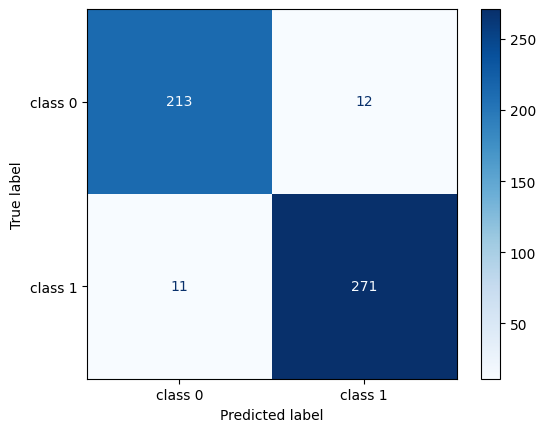

In [145]:
# Imprimir los mejores parámetros encontrados
print("Best Parameters:", grid_searchsvmrfe.best_params_)
# Usar el mejor modelo encontrado para hacer predicciones
best_modelsvmrfe = grid_searchsvmrfe.best_estimator_

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

y_predsvmrfe = best_modelsvmrfe.predict(X_test_rfe)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testrfe, y_predsvmrfe))
print("Classification Report:\n", classification_report(y_testrfe, y_predsvmrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_predsvmrfe, display_labels=target_names, cmap=plt.cm.Blues)

In [146]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predsvmrfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Onceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    261
3      6
0    225
5     10
1      3
2      2
Name: Onceavo, dtype: int64
Aciertos de Predicción:
 4    251
0    213
3      5
5     10
1      3
2      2
Name: Onceavo, dtype: int64
Errores de Predicción:
 3     1
4    10
0    12
Name: Onceavo, dtype: int64
Total Correctas: 484, Total Errores: 23


In [147]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predsvmrfe))

El coeficiente de correlacion de Matthews es de  0.9080747074439756


### Con Feature Selection **FI**

Fitting 6 folds for each of 50 candidates, totalling 300 fits
Best Parameters: {'C': np.float64(568.9866029018305)}
Elapsed time: 0.01 min.
Accuracy: 0.8557692307692307
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.97      0.84       211
           1       0.97      0.78      0.87       309

    accuracy                           0.86       520
   macro avg       0.86      0.87      0.86       520
weighted avg       0.88      0.86      0.86       520



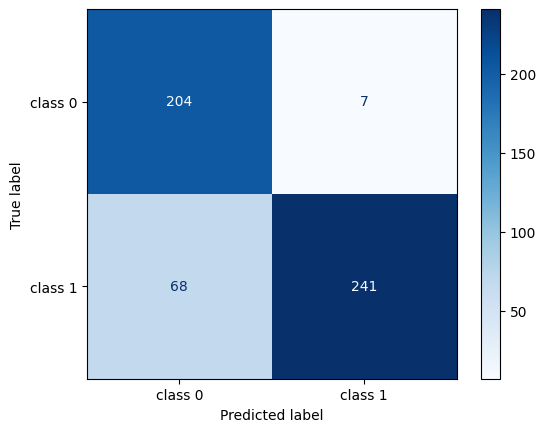

In [148]:
start=perf_counter()

svmda=LinearSVC(class_weight='balanced', max_iter=50000, dual=False)
# Definir los parámetros para la búsqueda de malla
param_grid = {
    'C': np.logspace(-5, 5, 50)
}
# Realizar la búsqueda de malla con validación cruzada
grid_searchsvmdt = RandomizedSearchCV(estimator=svmda, param_distributions=param_grid,
    n_iter=1000,  
    scoring='f1_macro',
    n_jobs=-1,
    cv=6,
    verbose=3,
    random_state=42)
grid_searchsvmdt.fit(X_train_fi, y_trainfi)
# Imprimir los mejores parámetros encontrados
print("Best Parameters:", grid_searchsvmdt.best_params_)
# Usar el mejor modelo encontrado para hacer predicciones
best_modelsvmdt = grid_searchsvmdt.best_estimator_

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

y_predsvmfi = best_modelsvmdt.predict(X_test_fi)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testfi, y_predsvmfi))
print("Classification Report:\n", classification_report(y_testfi, y_predsvmfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_predsvmfi, display_labels=target_names, cmap=plt.cm.Blues)


In [149]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predsvmfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Doceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    286
3      9
0    211
5      9
1      2
2      3
Name: Doceavo, dtype: int64
Aciertos de Predicción:
 4    221
0    204
3      7
5      8
1      2
2      3
Name: Doceavo, dtype: int64
Errores de Predicción:
 3     2
4    65
0     7
Name: Doceavo, dtype: int64
Total Correctas: 445, Total Errores: 75


In [150]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predsvmfi))

El coeficiente de correlacion de Matthews es de  0.7341607717425962


## Naive Bayes

### Con RFE

Accuracy: 0.8067061143984221
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.96      0.81       225
           1       0.95      0.69      0.80       282

    accuracy                           0.81       507
   macro avg       0.83      0.82      0.81       507
weighted avg       0.84      0.81      0.81       507

El coeficiente de correlacion de Matthews es de  0.6519693339801138


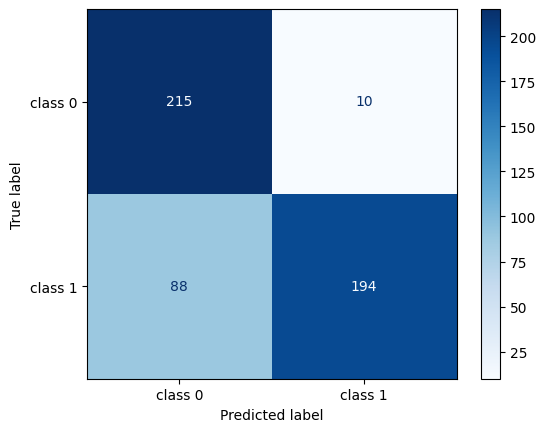

In [151]:
#Creamos el clasificado con GaussianNB, para features con valores continuos
clfnvrfe=GaussianNB()


clfnvrfe.fit(X_train_rfe, y_trainrfe)

y_prednvrfe=clfnvrfe.predict(X_test_rfe)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testrfe, y_prednvrfe))
print("Classification Report:\n", classification_report(y_testrfe, y_prednvrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_prednvrfe, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_prednvrfe))


In [152]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_prednvrfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Treceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    261
3      6
0    225
5     10
1      3
2      2
Name: Treceavo, dtype: int64
Aciertos de Predicción:
 4    180
0    215
3      5
5      5
1      2
2      2
Name: Treceavo, dtype: int64
Errores de Predicción:
 3     1
4    81
0    10
Name: Treceavo, dtype: int64
Total Correctas: 409, Total Errores: 98


### Con FI

Accuracy: 0.7480769230769231
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.98      0.76       211
           1       0.97      0.59      0.74       309

    accuracy                           0.75       520
   macro avg       0.80      0.78      0.75       520
weighted avg       0.83      0.75      0.75       520

El coeficiente de correlacion de Matthews es de  0.581073032674033


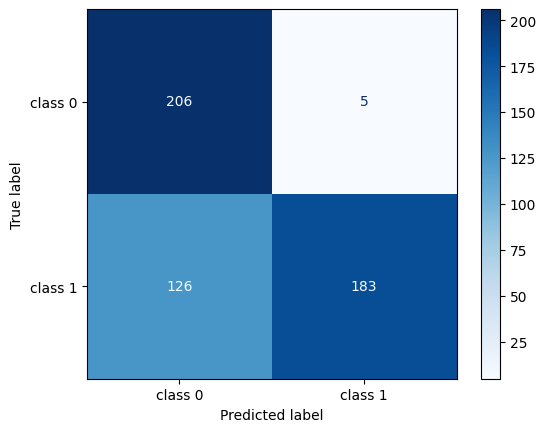

In [153]:
#Creamos el clasificado con GaussianNB, para features con valores continuos
clfnv = GaussianNB()
clfnv.fit(X_train_fi, y_trainfi)

y_prednvfi=clfnv.predict(X_test_fi)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testfi, y_prednvfi))
print("Classification Report:\n", classification_report(y_testfi, y_prednvfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_prednvfi, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_prednvfi))

In [154]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_prednvfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Catorceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    286
3      9
0    211
5      9
1      2
2      3
Name: Catorceavo, dtype: int64
Aciertos de Predicción:
 4    165
0    206
3      5
5      8
1      2
2      3
Name: Catorceavo, dtype: int64
Errores de Predicción:
 3      4
4    121
0      5
Name: Catorceavo, dtype: int64
Total Correctas: 389, Total Errores: 131


## Ann

### Optuna y RFE

In [155]:
start=perf_counter()

# Extraemos el número de features
num_features = X_train_rfe.shape[1]

#Creo el modelo
best_modelfrnrfe= None

def build_model(trial):
    # Inicializa la lista de capas
    num_layers = trial.suggest_int('num_layers', 1, 8)
    units_per_layer = [trial.suggest_int(f'units_layer_{i}', 256, 1024,256) for i in range(num_layers)]
    #dropout_rate = [trial.suggest_uniform(f'dropout_rate_{i}', 0.0, 0.2) for i in range(num_layers)]
    activators= [trial.suggest_categorical(f'activator_{i}', ['relu', 'leaky_relu', 'tanh']) for i in range(num_layers)]
    kernelinit= [trial.suggest_categorical(f'kernelinit_{i}',['HeNormal','HeUniform','GlorotNormal','GlorotUniform']) for i in range(num_layers)]
    print("Capas ", num_layers, "units per layer: ", units_per_layer)
    # Determina el número de épocas y el tamaño del lote (batch size)
    num_epochs = trial.suggest_int('num_epochs', 10, 50,10)
    batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32])
    
    # Construye el modelo
    model = Sequential()
    model.add(Dense(units_per_layer[0], activation=activators[0], kernel_initializer=kernelinit[0], input_shape=(num_features,)))
    #model.add(Dropout(dropout_rate[0]))
    
    # Añade las capas ocultas
    for i in range(1,num_layers):
        model.add(Dense(units_per_layer[i], activation=activators[i], kernel_initializer=kernelinit[i]))
        
        #model.add(Dropout(dropout_rate[i])) 
        
    
    # Capa de salida
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    # Compila el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model, num_epochs, batch_size

def objective(trial):
    # Construye y compila el modelo
    modelrn, num_epochs, batch_size = build_model(trial)
    
    #Cargo el best_model 
    global best_modelfrnrfe

    #Callback
    callback= EarlyStopping(monitor='loss', patience=10, mode='min', restore_best_weights=True)
    # Entrena el modelo
    modelrn.fit(X_train_rfe, y_trainrfe, epochs=num_epochs, batch_size=batch_size, verbose=0, callbacks=[callback])
    
    # Evalúa el modelo
    score = modelrn.evaluate(X_test_rfe, y_testrfe, verbose=0)
    
    # Si no hay un trial registrado o si el modelo actual es mejor, almacénalo en 'best_model'
    if trial.number == 0 or score[1] > trial.study.best_value:
        best_modelfrnrfe = modelrn  # Almacena el modelo si es el mejor hasta ahora
    
    return score[1]

# Crea un estudio de Optuna
studyrn = optuna.create_study(direction='maximize')
studyrn.optimize(objective, n_trials=100, show_progress_bar=True)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

  0%|          | 0/100 [00:00<?, ?it/s]

Capas  3 units per layer:  [768, 1024, 768]
Capas  7 units per layer:  [1024, 1024, 256, 768, 512, 1024, 512]
Capas  7 units per layer:  [1024, 1024, 1024, 1024, 768, 256, 512]
Capas  8 units per layer:  [1024, 768, 512, 512, 256, 768, 1024, 512]
Capas  2 units per layer:  [1024, 1024]
Capas  2 units per layer:  [256, 1024]
Capas  5 units per layer:  [512, 512, 256, 768, 256]
Capas  5 units per layer:  [768, 512, 768, 256, 512]
Capas  6 units per layer:  [768, 1024, 1024, 768, 512, 512]
Capas  3 units per layer:  [1024, 256, 256]
Capas  1 units per layer:  [512]
Capas  8 units per layer:  [768, 768, 512, 256, 1024, 1024, 1024, 512]
Capas  4 units per layer:  [768, 768, 768, 512]
Capas  4 units per layer:  [512, 768, 512, 512]
Capas  8 units per layer:  [1024, 768, 768, 1024, 256, 768, 1024, 768]
Capas  3 units per layer:  [768, 512, 512]
Capas  6 units per layer:  [256, 768, 768, 512, 256, 512]
Capas  3 units per layer:  [1024, 256, 512]
Capas  1 units per layer:  [768]
Capas  6 units 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       225
           1       0.98      0.97      0.97       282

    accuracy                           0.97       507
   macro avg       0.97      0.97      0.97       507
weighted avg       0.97      0.97      0.97       507



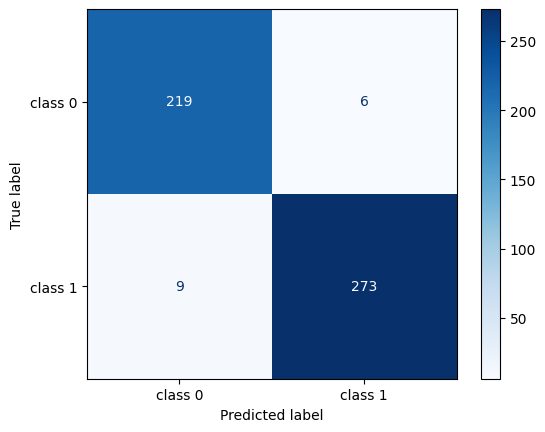

In [156]:
y_pred_probarfe = best_modelfrnrfe.predict(X_test_rfe)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrnrfe = (y_pred_probarfe > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(y_testrfe, y_predfrnrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_predfrnrfe, display_labels=target_names, cmap=plt.cm.Blues)

In [157]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predfrnrfe))

El coeficiente de correlacion de Matthews es de  0.9402189253964325


In [158]:
y_predfrnrfe_flat=y_predfrnrfe.flatten()
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predfrnrfe_flat
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Quinceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    261
3      6
0    225
5     10
1      3
2      2
Name: Quinceavo, dtype: int64
Aciertos de Predicción:
 4    254
0    219
3      5
5      9
1      3
2      2
Name: Quinceavo, dtype: int64
Errores de Predicción:
 3    1
4    7
0    6
Name: Quinceavo, dtype: int64
Total Correctas: 492, Total Errores: 15


### Optuna y FI

In [159]:
start=perf_counter()

# Extraemos el número de features
num_features = X_train_fi.shape[1]

#Creo el modelo
best_modelrnfi= None

def build_model(trial):
    # Inicializa la lista de capas
    num_layers = trial.suggest_int('num_layers', 1, 8)
    units_per_layer = [trial.suggest_int(f'units_layer_{i}', 256, 1024,256) for i in range(num_layers)]
    #dropout_rate = [trial.suggest_uniform(f'dropout_rate_{i}', 0.0, 0.2) for i in range(num_layers)]
    activators= [trial.suggest_categorical(f'activator_{i}', ['relu', 'leaky_relu', 'tanh']) for i in range(num_layers)]
    kernelinit= [trial.suggest_categorical(f'kernelinit_{i}',['HeNormal','HeUniform','GlorotNormal','GlorotUniform']) for i in range(num_layers)]
    print("Capas ", num_layers, "units per layer: ", units_per_layer)
    # Determina el número de épocas y el tamaño del lote (batch size)
    num_epochs = trial.suggest_int('num_epochs', 10, 50,10)
    batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32])
    
    # Construye el modelo
    model = Sequential()
    model.add(Dense(units_per_layer[0], activation=activators[0], kernel_initializer=kernelinit[0], input_shape=(num_features,)))
    #model.add(Dropout(dropout_rate[0]))
    
    # Añade las capas ocultas
    for i in range(1,num_layers):
        model.add(Dense(units_per_layer[i], activation=activators[i], kernel_initializer=kernelinit[i]))
        
        #model.add(Dropout(dropout_rate[i])) 
        
    
    # Capa de salida
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    # Compila el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model, num_epochs, batch_size

def objective(trial):
    # Construye y compila el modelo
    modelrnfi, num_epochs, batch_size = build_model(trial)
    
    #Cargo el best_model 
    global best_modelrnfi

    #Callback
    callback= EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
    # Entrena el modelo
    modelrnfi.fit(X_train_fi, y_trainfi, epochs=num_epochs, batch_size=batch_size, verbose=0, callbacks=[callback])
    
    # Evalúa el modelo
    score = modelrnfi.evaluate(X_test_fi, y_testfi, verbose=0)
    
    # Si no hay un trial registrado o si el modelo actual es mejor, almacénalo en 'best_model'
    if trial.number == 0 or score[1] > trial.study.best_value:
        best_modelrnfi = modelrnfi  # Almacena el modelo si es el mejor hasta ahora

    return score[1]

# Crea un estudio de Optuna
studyrn = optuna.create_study(direction='maximize')
studyrn.optimize(objective, n_trials=100, show_progress_bar=True)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

  0%|          | 0/100 [00:00<?, ?it/s]

Capas  2 units per layer:  [512, 256]
Capas  1 units per layer:  [512]
Capas  6 units per layer:  [512, 768, 1024, 1024, 512, 256]
Capas  6 units per layer:  [768, 256, 1024, 768, 512, 256]
Capas  1 units per layer:  [1024]
Capas  7 units per layer:  [512, 768, 768, 1024, 256, 256, 768]
Capas  4 units per layer:  [512, 256, 1024, 256]
Capas  8 units per layer:  [256, 1024, 256, 256, 256, 256, 1024, 768]
Capas  7 units per layer:  [256, 768, 256, 1024, 768, 256, 1024]
Capas  2 units per layer:  [1024, 768]
Capas  5 units per layer:  [768, 1024, 768, 768, 1024]
Capas  8 units per layer:  [256, 1024, 256, 256, 256, 1024, 256, 768]
Capas  8 units per layer:  [256, 1024, 512, 512, 512, 512, 1024, 512]
Capas  5 units per layer:  [256, 512, 512, 512, 256]
Capas  6 units per layer:  [768, 512, 256, 256, 512, 512]
Capas  7 units per layer:  [256, 1024, 768, 768, 768, 768, 512]
Capas  4 units per layer:  [512, 768, 512, 512]
Capas  8 units per layer:  [256, 512, 1024, 1024, 256, 256, 768, 1024]


In [160]:
X_test_fi.shape

(520, 14)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       211
           1       0.99      0.99      0.99       309

    accuracy                           0.98       520
   macro avg       0.98      0.98      0.98       520
weighted avg       0.98      0.98      0.98       520



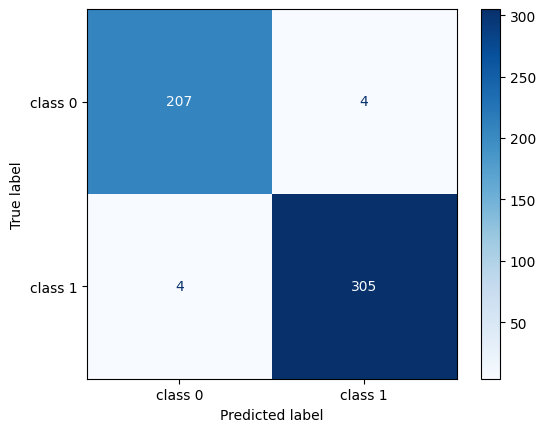

In [161]:
y_pred_probafi = best_modelrnfi.predict(X_test_fi)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrnfi = (y_pred_probafi > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(y_testfi, y_predfrnfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_predfrnfi, display_labels=target_names, cmap=plt.cm.Blues)

In [162]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predfrnfi))

El coeficiente de correlacion de Matthews es de  0.9680976702096658


In [163]:
y_predfrnfi_flat=y_predfrnfi.flatten()

df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predfrnfi_flat
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Dieciseisavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 4    286
3      9
0    211
5      9
1      2
2      3
Name: Dieciseisavo, dtype: int64
Aciertos de Predicción:
 4    284
0    207
3      7
5      9
1      2
2      3
Name: Dieciseisavo, dtype: int64
Errores de Predicción:
 3    2
4    2
0    4
Name: Dieciseisavo, dtype: int64
Total Correctas: 512, Total Errores: 8


# Validacion

## RFE

In [164]:
X_test_rfe.columns



Index(['flowduration', 'min_fpktl', 'min_bpktl', 'max_bpktl', 'max_bipt',
       'mean_bipt', 'fPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl',
       'std_flowpktl', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_ack'],
      dtype='object')

In [165]:
dftrrfe=df_val_f.copy()
dftrrfe.shape


dftrfe=dftrrfe[['flowduration', 'min_fpktl', 'min_bpktl', 'max_bpktl', 'max_bipt',
       'mean_bipt', 'fPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl',
       'std_flowpktl', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_ack','label']].copy()
print(dftrfe.shape)


# Eliminar duplicados
print("Duplicados: ",dftrfe.duplicated().sum())

dftrfe = dftrfe.drop_duplicates()

print("Valores nulos: ", dftrfe.isnull().values.sum())
dftrfe.dropna(inplace=True)

#collections.Counter(df.dftrfe.values)

# Balancear clases con subsampling (reduce clase mayoritaria)
df_class0_val = dftrfe[dftrfe['label'] == 0]
df_class1_val = dftrfe[dftrfe['label'] == 1]


df_class1_down_val = resample(df_class1_val,
                             replace=False,
                             n_samples=len(df_class0_val),
                             random_state=42)

# Dataset balanceado para validación
df_val_balanced = pd.concat([df_class0_val, df_class1_down_val])

# Mezclar datos
df_val_balanced = df_val_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_val_balanced['label'].value_counts())


dftrfe_test = df_val_balanced['label']
dftrfet = df_val_balanced.drop(columns=['label'])

#dftrfe_test=dftrfe['label']
#dftrfet=dftrfe.drop(columns=['label']) 


numeric_colsdftr = dftrfet.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_colsdftr)], remainder='passthrough')

# fit on the trainning dataset
preprocessor.fit_transform(dftrfet)
dftrfet_stand = preprocessor.transform(dftrfet)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.


labelsdftrfe=list(dftrfet.columns.values.tolist())
df_rfe_dft_stand=pd.DataFrame(dftrfet_stand,columns=labelsdftrfe)

print("Valores nulos: ", df_rfe_dft_stand.isnull().values.sum())
print("Duplicados: ",df_rfe_dft_stand.duplicated().sum())


(2029, 15)
Duplicados:  0
Valores nulos:  0
label
1    149
0    149
Name: count, dtype: int64
Valores nulos:  0
Duplicados:  0


              precision    recall  f1-score   support

     class 0       0.95      0.89      0.92       149
     class 1       0.89      0.95      0.92       149

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



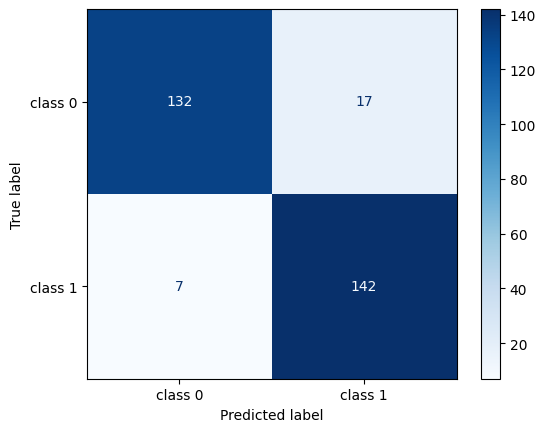

In [166]:
y_predbrlorfedt = best_modelrlo.predict(df_rfe_dft_stand)



#performance results
print(classification_report(dftrfe_test, y_predbrlorfedt, target_names=target_names))

cm = confusion_matrix(dftrfe_test, y_predbrlorfedt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.01), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(2), max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(1000), n_jobs=None,
              num_parallel_tree=None, ...)
Score: 0.9822212686834012
Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.01      0.01       149
           1       0

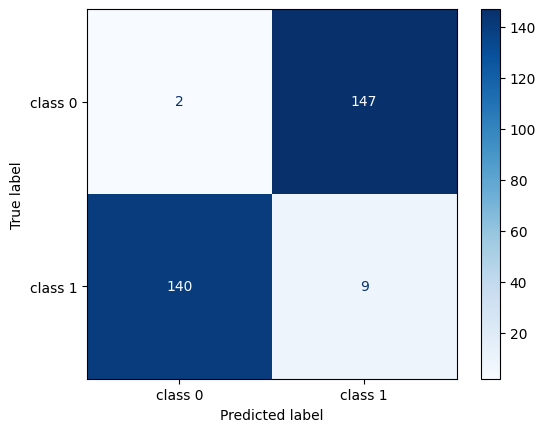

In [167]:


# Predecir y evaluar el modelo
y_predxgbrfedft = grid_xgbrfe.predict(df_rfe_dft_stand)
print("Best Parameters:", grid_xgbrfe.best_estimator_)
print("Score:", grid_xgbrfe.best_score_)
print("Classification Report:\n", classification_report(dftrfe_test, y_predxgbrfedft))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_predxgbrfedft, display_labels=target_names, cmap=plt.cm.Blues)

Accuracy: 0.9194630872483222
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       149
           1       0.89      0.95      0.92       149

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



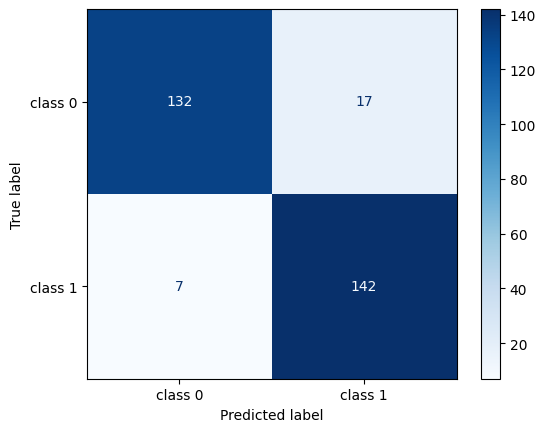

In [168]:
y_predsvmrfedft = best_modelsvmrfe.predict(df_rfe_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dftrfe_test, y_predsvmrfedft))
print("Classification Report:\n", classification_report(dftrfe_test, y_predsvmrfedft))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_predsvmrfedft, display_labels=target_names, cmap=plt.cm.Blues)

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.50      1.00      0.67       149

    accuracy                           0.50       298
   macro avg       0.25      0.50      0.33       298
weighted avg       0.25      0.50      0.33       298

El coeficiente de correlacion de Matthews es de  0.0


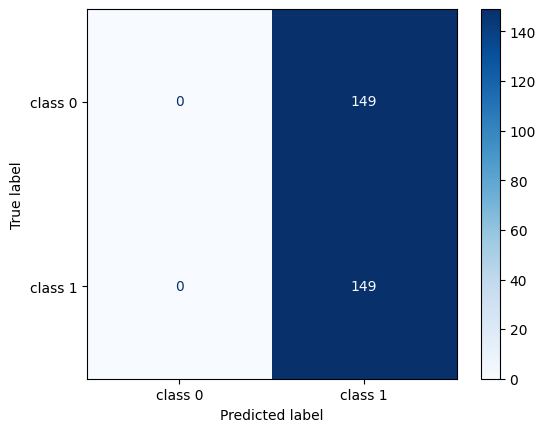

In [169]:
y_prednvrfedft=clfnvrfe.predict(df_rfe_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dftrfe_test, y_prednvrfedft))
print("Classification Report:\n", classification_report(dftrfe_test, y_prednvrfedft))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_prednvrfedft, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dftrfe_test, y_prednvrfedft))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.90      0.77       149
           1       0.85      0.56      0.68       149

    accuracy                           0.73       298
   macro avg       0.76      0.73      0.72       298
weighted avg       0.76      0.73      0.72       298



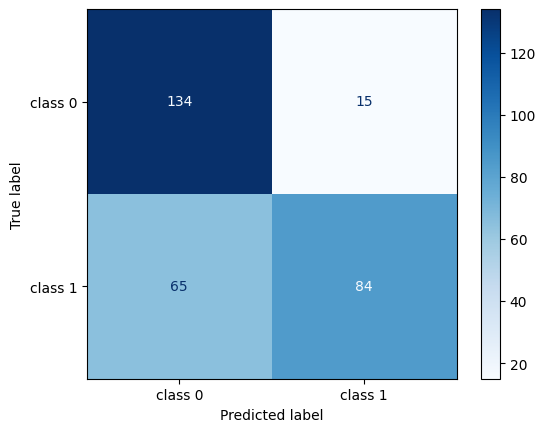

In [170]:
y_pred_probarfedft = best_modelfrnrfe.predict(df_rfe_dft_stand)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrnrfedft = (y_pred_probarfedft > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(dftrfe_test, y_predfrnrfedft))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_predfrnrfedft, display_labels=target_names, cmap=plt.cm.Blues)

In [171]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dftrfe_test, y_predfrnrfedft))

El coeficiente de correlacion de Matthews es de  0.4915921681163279


## FI


In [172]:
X_test_fi.columns

Index(['flowduration', 'total_fpktl', 'min_fpktl', 'max_bpktl', 'mean_bpktl',
       'std_fpktl', 'min_fipt', 'min_bipt', 'max_bipt', 'bpsh_cnt',
       'bPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl',
       'mean_flowipt'],
      dtype='object')

In [173]:
dftee=df_val_f.copy()
dftee.shape


dft=dftee[['flowduration', 'total_fpktl', 'min_fpktl', 'max_bpktl', 'mean_bpktl',
       'std_fpktl', 'min_fipt', 'min_bipt', 'max_bipt', 'bpsh_cnt',
       'bPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl',
       'mean_flowipt','label']].copy()
print(dft.shape)


# Eliminar duplicados
print("Duplicados: ",dft.duplicated().sum())

dft = dft.drop_duplicates()

print("Valores nulos: ", dft.isnull().values.sum())
dft.dropna(inplace=True)

#collections.Counter(df.dft.values)

# Balancear clases con subsampling (reduce clase mayoritaria)
dffi_class0_val = dft[dft['label'] == 0]
dffi_class1_val = dft[dft['label'] == 1]


dffi_class1_down_val = resample(dffi_class1_val,
                             replace=False,
                             n_samples=len(dffi_class0_val),
                             random_state=42)

# Dataset balanceado para validación
dffi_val_balanced = pd.concat([dffi_class0_val, dffi_class1_down_val])

# Mezclar datos
dffi_val_balanced = dffi_val_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(dffi_val_balanced['label'].value_counts())


dft_test = dffi_val_balanced['label']
dftt = dffi_val_balanced.drop(columns=['label'])

# dft_test=dft['label']
# dftt=dft.drop(columns=['label']) 


numeric_colsdft = dftt.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_colsdft)], remainder='passthrough')

# fit on the trainning dataset
preprocessor.fit_transform(dftt)
dft_stand = preprocessor.transform(dftt)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.


labelsdft=list(dftt.columns.values.tolist())
df_dft_stand=pd.DataFrame(dft_stand,columns=labelsdft)

print("Valores nulos: ", dftt.isnull().values.sum())
print("Duplicados: ",dftt.duplicated().sum())



(2029, 15)
Duplicados:  0
Valores nulos:  0
label
1    149
0    149
Name: count, dtype: int64
Valores nulos:  0
Duplicados:  0


In [174]:
dft.shape

(2029, 15)

In [175]:
# Testing model
#dtfi, mdtop
y_preddttfi = mdtop.predict(df_dft_stand)
y_probdttfi = mdtop.predict_proba(df_dft_stand)
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_preddttfi, dft_test))

Accuracy of Decision Tree-Test:  0.31208053691275167


              precision    recall  f1-score   support

           0       0.22      0.15      0.18       149
           1       0.36      0.48      0.41       149

    accuracy                           0.31       298
   macro avg       0.29      0.31      0.29       298
weighted avg       0.29      0.31      0.29       298



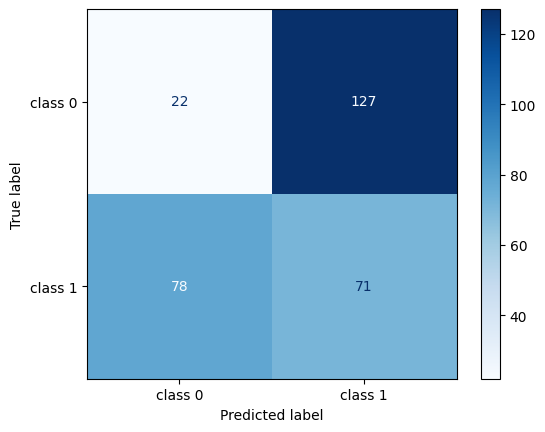

In [176]:
#Classification for test before hyperparameter tuning
print(classification_report(dft_test,y_preddttfi))
ConfusionMatrixDisplay.from_predictions(dft_test, y_preddttfi, display_labels=target_names, cmap=plt.cm.Blues)

Mejor modelo accuracy score: 0.1174
Mejores parámetros:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': np.int64(100)}
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.07      0.08       149
           1       0.15      0.16      0.15       149

    accuracy                           0.12       298
   macro avg       0.11      0.12      0.12       298
weighted avg       0.11      0.12      0.12       298



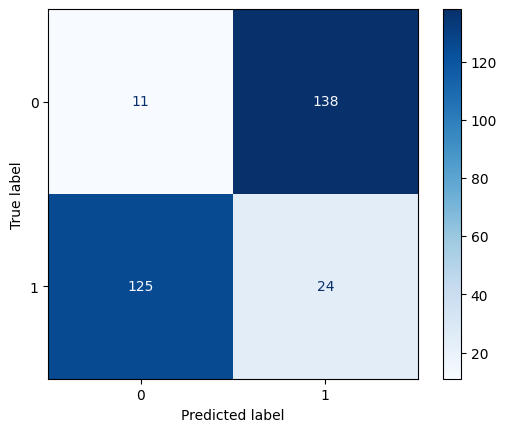

In [177]:
#RF
y_predrft = best_clfrf.predict(df_dft_stand)

# Evaluar el mejor modelo
print('Mejor modelo accuracy score: {0:0.4f}'. format(accuracy_score(dft_test, y_predrft)))
print("Mejores parámetros: ", grid_searchrf.best_params_)

print("Classification Report:\n", classification_report(dft_test, y_predrft))

# Print the Confusion Matrix and slice it into four pieces

ConfusionMatrixDisplay.from_predictions(dft_test, y_predrft, cmap=plt.cm.Blues);

In [178]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dft_test, y_predrft))

El coeficiente de correlacion de Matthews es de  -0.7680294792817212


Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.14      0.18       149
           1       0.39      0.56      0.46       149

    accuracy                           0.35       298
   macro avg       0.32      0.35      0.32       298
weighted avg       0.32      0.35      0.32       298



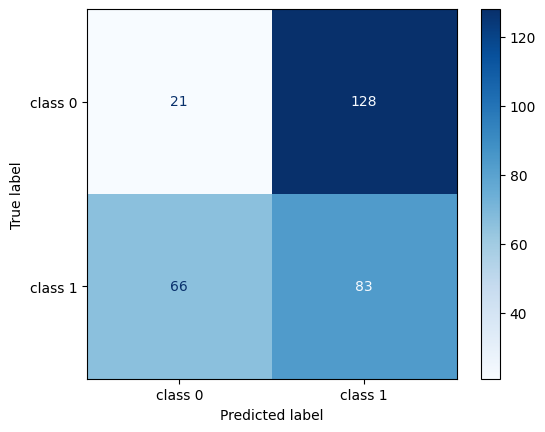

In [179]:
# Predecir y evaluar el modelo
y_predxgbfit = grid_xgbfi.predict(df_dft_stand)
print("Classification Report:\n", classification_report(dft_test, y_predxgbfit))
ConfusionMatrixDisplay.from_predictions(dft_test, y_predxgbfit, display_labels=target_names, cmap=plt.cm.Blues)

In [180]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dft_test, y_predxgbfit))

El coeficiente de correlacion de Matthews es de  -0.33213271821208096


Accuracy: 0.48322147651006714
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.92      0.64       149
           1       0.37      0.05      0.08       149

    accuracy                           0.48       298
   macro avg       0.43      0.48      0.36       298
weighted avg       0.43      0.48      0.36       298



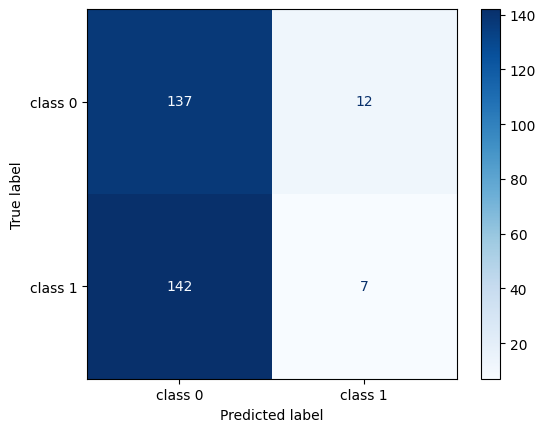

In [181]:

y_predsvmtfit = best_modelsvmdt.predict(df_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dft_test, y_predsvmtfit))
print("Classification Report:\n", classification_report(dft_test, y_predsvmtfit))
ConfusionMatrixDisplay.from_predictions(dft_test, y_predsvmtfit, display_labels=target_names, cmap=plt.cm.Blues)

Accuracy: 0.5033557046979866
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.01       149
           1       0.50      1.00      0.67       149

    accuracy                           0.50       298
   macro avg       0.75      0.50      0.34       298
weighted avg       0.75      0.50      0.34       298

El coeficiente de correlacion de Matthews es de  0.058025885318565944


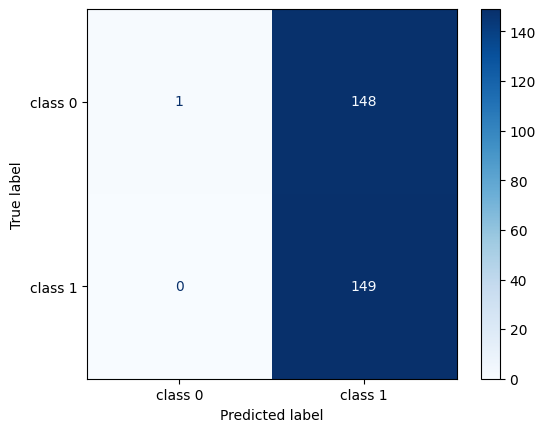

In [182]:
y_prednvfit=clfnv.predict(df_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dft_test, y_prednvfit))
print("Classification Report:\n", classification_report(dft_test, y_prednvfit))
ConfusionMatrixDisplay.from_predictions(dft_test, y_prednvfit, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dft_test, y_prednvfit))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.08      0.08       149
           1       0.11      0.11      0.11       149

    accuracy                           0.10       298
   macro avg       0.10      0.10      0.10       298
weighted avg       0.10      0.10      0.10       298



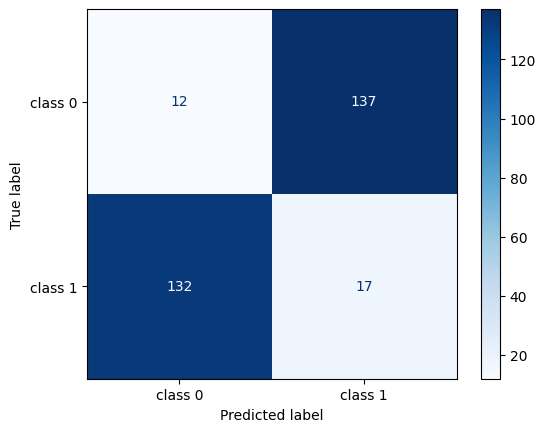

In [183]:
y_pred_probadftt = best_modelrnfi.predict(df_dft_stand)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrndftt = (y_pred_probadftt > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(dft_test, y_predfrndftt))
ConfusionMatrixDisplay.from_predictions(dft_test, y_predfrndftt, display_labels=target_names, cmap=plt.cm.Blues)